In [3]:
import pandas as pd

In [ ]:
#so I will aim to do catboost plus shap and sem for now

In [78]:
import dill

# Path to where you want to save the session
session_path = r"D:\My_projects\Drug Use\capstone\workspace.pkl"

# Save all variables, dataframes, models, etc.
dill.dump_session(session_path)

print(f"✅ Session saved successfully to: {session_path}")


✅ Session saved successfully to: D:\My_projects\Drug Use\capstone\workspace.pkl


In [1]:
import os
os.chdir('D://My_projects//Drug Use//capstone')
import dill
dill.load_session('workspace.pkl')


## Data, Independent variables, Wave I

In [28]:
import os
os.chdir("D://My_projects//Drug Use//ICPSR_21600-V25//ICPSR_21600//DS0001")

In [30]:
file_path="21600-0001-Data.tsv"

In [32]:
df = pd.read_csv(file_path, sep='\t', low_memory=False)

In [1080]:
'BIO_SEX' in df

True

In [64]:
df.describe()

,IMONTH,IDAY,IYEAR,SCH_YR,BIO_SEX,SMP01,SMP03,H1GI1M,H1GI1Y,H1GI2,...,H1WS4G,H1WS5G,H1WS6G,H1WS7G,H1WS8G,H1WS9G,H1WS10G,H1WS11G,H1WS12G,H1WS13
count,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,...,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.000000
mean,6.577645,15.735855,94.999846,0.354397,1.516759,0.933579,0.079951,6.604090,78.970941,0.542589,...,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.038130
std,1.403560,8.708040,0.012400,0.483165,0.502825,0.249035,0.271238,3.905455,1.809704,0.575287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.706785
min,1.000000,1.000000,94.000000,0.000000,1.000000,0.000000,0.000000,1.000000,74.000000,0.000000,...,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,0.000000
25%,5.000000,8.000000,95.000000,0.000000,1.000000,1.000000,0.000000,4.000000,78.000000,0.000000,...,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.000000
50%,6.000000,15.000000,95.000000,0.000000,2.000000,1.000000,0.000000,7.000000,79.000000,1.000000,...,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.000000
75%,8.000000,23.000000,95.000000,1.000000,2.000000,1.000000,0.000000,9.000000,80.000000,1.000000,...,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.000000
max,12.000000,31.000000,95.000000,6.000000,6.000000,1.000000,1.000000,96.000000,96.000000,8.000000,...,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,9.000000


In [66]:
df.isna().sum()

AID       0
IMONTH    0
IDAY      0
IYEAR     0
SCH_YR    0
         ..
PD4F      0
PD5       0
PD5A      0
AH_PVT    0
AH_RAW    0
Length: 2794, dtype: int64

In [1100]:
df['IMONTH'].dtype


dtype('int64')

In [1114]:
## people refused to answer if they were born in the united states!!!! a lot!!! therefore not born?? also refused to answer about their race!

In [70]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("\nMissing value ratio (top 10):")
print(df.isna().mean().sort_values(ascending=False).head(10))


Rows: 6504
Columns: 2794

Missing value ratio (top 10):
AID       0.0
H1FV13    0.0
H1FV5     0.0
H1FV6     0.0
H1FV7     0.0
H1FV8     0.0
H1FV9     0.0
H1FV10    0.0
H1FV11    0.0
H1FV12    0.0
dtype: float64


## Target Variables, Wave IV

In [1121]:
import os
os.chdir("D://My_projects//Drug Use//ICPSR_21600-V25//ICPSR_21600//DS0022")
file_path_2="21600-0022-Data.tsv"

In [1123]:
df_2= pd.read_csv(file_path_2, sep='\t', low_memory=False)

In [72]:
df1=df.copy()

In [76]:
#merge the target variables with the indepemndent variables, age at first drink, number of drinking days in the past year,number of times he drinks at peak, numbr of drinks
df1['AID'] = df1['AID'].astype(str)
df_2['AID'] = df_2['AID'].astype(str)
df1 = df1.merge(
    df_2[['AID','H4TO34', 'H4TO35','H4TO36','H4TO44' ,'H4TO45']],
    on='AID',
    how='left'
)


In [78]:
df1[['H4TO34', 'H4TO35','H4TO36','H4TO44','H4TO45']].info()
df1[['H4TO34', 'H4TO35','H4TO36','H4TO44','H4TO45']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H4TO34  5114 non-null   float64
 1   H4TO35  5114 non-null   float64
 2   H4TO36  5114 non-null   float64
 3   H4TO44  5114 non-null   float64
 4   H4TO45  5114 non-null   float64
dtypes: float64(5)
memory usage: 254.2 KB


,H4TO34,H4TO35,H4TO36,H4TO44,H4TO45
0,NaN,NaN,NaN,NaN,NaN
1,16.0,2.0,10.0,97.0,97.0
2,NaN,NaN,NaN,NaN,NaN
3,97.0,97.0,97.0,97.0,97.0
4,NaN,NaN,NaN,NaN,NaN


In [80]:
matched = df1['H4TO44'].notna().sum()
print(f"{matched} respondents had drinking data merged successfully.")


5114 respondents had drinking data merged successfully.


In [82]:
print(df1.shape)
df1['AID'].nunique()


(6504, 2799)


6504

In [84]:
#description for dependent variables
df1[['H4TO34', 'H4TO35']].describe()
df1[['H4TO34', 'H4TO35']].value_counts(dropna=False)


H4TO34  H4TO35
NaN     NaN       1390
97.0    97.0      1027
16.0    4.0        189
15.0    4.0        146
16.0    3.0        132
                  ... 
25.0    1.0          1
9.0     3.0          1
25.0    3.0          1
12.0    98.0         1
9.0     1.0          1
Name: count, Length: 168, dtype: int64

In [88]:
#remove missing data
targets = ['H4TO34', 'H4TO35', 'H4TO44', 'H4TO45']

df1 = df1.dropna(subset=targets, how='all')


In [90]:
df1.shape

(5114, 2799)

## EDA

In [1142]:
#import weights dataset
import os
os.chdir("D://My_projects//Drug Use//ICPSR_21600-V25//ICPSR_21600//DS0031")
file_path_W="21600-0031-Data.tsv"
df_W = pd.read_csv(file_path_W, sep='\t', low_memory=False)

In [231]:
# merge the weight variable
df_W['AID'] = df_W['AID'].astype(str)
df1 = df1.merge(
    df_W[['AID', 'GSWGT134']],
    on='AID',
    how='left'
)


In [96]:
df1['GSWGT134'].isna().sum()


0

In [98]:
df1['GSWGT134'].describe()


count     5114
unique    1606
top           
freq       906
Name: GSWGT134, dtype: object

## Univariate Analysis

In [218]:
#varrename
var_labels = {
    # 'TotalDrinking' dependent variable
    'H1GI8' :'Race',
    'H4TO34': 'Age at First Drink',
    'H4TO35': 'Drinking Days (Past Year)',
    'H4TO36': 'Drinks per Occasion (Past Year)',
    'H4TO44': 'Times Drank Alcohol (Peak Year)',
    'H4TO45': 'Drinks per Occasion (Peak Year)',
    'H1GI3':'Age when Moved to Current Residence',
    'H1GI1Y':'BirthYear',
    'H1GH51':'Hours of Sleep', 
    'H1ED16':'Trouble Paying Attention',
    'H1RE1':'ReligionGroup',
    'H1RE4':'LowReligiousImportance',#
    'H1ED2':'TimesSkippedSchool',
    'H1ED19':'SchoolCloseness',#
    'H1ED7':'SchoolSuspension',
    'H1ED9':'SchoolExpulsion',# along with h1ed7 they make 'DisciplinaryIndex'#
    'H1TO29':'peer_alcohol_any',
    ####sexual motivations
    'H1MO1': 'FriendsRespect_Sex',
    'H1MO3': 'Rev_FeelGuilty_Sex',
    'H1MO4': 'Rev_UpsetMother_Sex',
    'H1MO5': 'Pleasure_Sex',
    'H1MO6': 'Relax_Sex',
    'H1MO7': 'Attractive_Sex',
    'H1MO8': 'LessLonely_Sex',
    
    #####Delinquent Behavior
    'H1DS5': 'Fight_Serious',
    'H1DS6': 'InjuredSomeone',
    'H1DS8': 'DroveWithoutPermission',
    'H1DS11': 'WeaponUse_Threat',
    'H1DS12': 'SoldDrugs',
    'H1DS14': 'GroupFight',
    'H1DS15': 'PublicRowdy',
    'H1DS3': 'LiedToParents',
    ######Drinking and sknoking:
    '''H1TO1': 'EverTried_Cigarette',
    'H1TO3': 'EverSmoked_Regularly',
    'H1TO4': 'Age_StartedSmoking',
    'H1TO5': 'Days_SmokedPast30',
    'H1TO7': 'CigsPerDay_Past30',
    'H1TO13': 'DrinkWithoutAdults',
    'H1TO14': 'Age_FirstDrinkNoAdults',
    'H1TO15': 'DrinkFrequency_Past12mo',
    'H1TO16': 'DrinksPerOccasion_Past12mo'''
    #####Socioeconomic Background and Parental Education
    'H1RM1': 'Mother_Education',
    'H1RF1': 'Father_Education',
    'PA55': 'Household_Income',
    'PA56': 'Bills_Payment_Ability',
    #####sports
    #SportsParticipation_Index
    ###Psychological
    #BluesInspiteOfHelp
    #LessThanOthers
    #'Unhappy', 
    #'Lonely', 
    #'UnfriendlyPeople', 
    #'HardToStart', 
    #'NotWorthLiving'
    
    #'SchoolTrouble_Index'#
    #GPA_Index
    #ParentalWarmth_Index#
    #ParentalSupervision_Index#
   
    

}
df1 = df1.rename(columns=var_labels)

In [102]:
#target variables
targets = ['Age at First Drink',
     'Drinking Days (Past Year)',
           'Drinks per Occasion (Past Year)',
     'Drinks per Occasion (Peak Year)',
      'Times Drank Alcohol (Peak Year)']
weight = 'GSWGT134'


In [104]:
import numpy as np
import pandas as pd

def weighted_mean(x, w):
    mask = ~np.isnan(x)
    return np.average(x[mask], weights=w[mask])

def weighted_median(x, w):
    mask = ~np.isnan(x)
    x, w = x[mask], w[mask]
    srt = np.argsort(x)
    x, w = x[srt], w[srt]
    cum_w = np.cumsum(w)
    cutoff = w.sum() / 2
    return x[np.searchsorted(cum_w, cutoff)]


In [354]:
df1['Age at First Drink'].describe()

count    5114.000000
mean       33.406336
std        32.966636
min         5.000000
25%        15.000000
50%        17.000000
75%        21.000000
max        98.000000
Name: Age at First Drink, dtype: float64

In [545]:
import numpy as np
import pandas as pd

# === H4TO44: "During the period when you drank the most, how often did you usually drink?" ===
days_ranges = {
    1:  0.5,       # less than 1 day a month
    2: 1,       # 1 day a month
    3:  2.5,       # 2–3 days a month
    4: 4,       # 1 day a week
    5: 8,       # 2 days a week
    6: 16,     # 3–5 days a week
    7: 27.5,     # every day or almost every day
    95: None, 96: None, 97: None, 98: None  # refused/don’t know/invalid
}


# Apply the mapping
df1['DaysPeak']   = df1[ 'Times Drank Alcohol (Peak Year)'].map(days_ranges)

df1['DrinkingDays']   = df1[ 'Drinking Days (Past Year)'].map(days_ranges)

print(df1[[ 'DaysPeak','DrinkingDays']].head(10))


   DaysPeak  DrinkingDays
0       NaN           1.0
1       NaN           NaN
2      27.5           8.0
3       NaN           4.0
4       NaN           0.5
5       NaN           NaN
6       NaN           1.0
7       2.5           1.0
8      16.0           4.0
9       0.5           0.5


In [549]:
import numpy as np
import pandas as pd

# --- Variables ---
vars = [
    'DaysPeak',
    'DrinkingDays',
]

weight = 'Weight'

# Ensure numeric weights
df1[weight] = pd.to_numeric(df1[weight], errors='coerce')

results = []

# --- Loop over simple numeric variables ---
for var in vars:
    # Drop missing values for this variable and weight
    temp = df1[[var, weight]].dropna()

    # Weighted mean
    if len(temp) == 0 or temp[weight].sum() == 0:
        mean_val = np.nan
        valid_n = 0
    else:
        mean_val = np.average(temp[var], weights=temp[weight])
        valid_n = len(temp)

    # % missing
    missing_ = df1[var].isna().mean() * 100

    # Append results
    results.append({
        'Variable': var,
        'Weighted Mean': round(mean_val, 2),
        'Missing %': round(missing_, 1),
        'Valid N': valid_n
    })

# --- Create summary DataFrame ---
summary_vars = pd.DataFrame(results)
print(summary_vars)


       Variable  Weighted Mean  Missing %  Valid N
0      DaysPeak          13.84       54.2     1945
1  DrinkingDays           3.49       28.3     3033


In [138]:
#race
var = 'Race'      
weight = 'Weight'
df1[weight] = pd.to_numeric(df1[weight], errors='coerce')

# Drop rows missing the variable or weight
df = df1[[var, weight]].dropna()

# Weighted counts per category
weighted_freq = (
    df1.groupby(var, as_index=False)[weight]
      .sum()
      .rename(columns={weight: 'Weighted_N'})
)
# Ensure weight is numeric
weighted_freq['Weighted_N'] = pd.to_numeric(weighted_freq['Weighted_N'], errors='coerce')
# Weighted percentage
weighted_freq['Weighted_%'] = (
    weighted_freq['Weighted_N'] / weighted_freq['Weighted_N'].sum() * 100
)

print(weighted_freq.sort_values('Weighted_%', ascending=False))


   Race    Weighted_N  Weighted_%
6     7  2.094828e+07   95.628904
0     1  4.646366e+05    2.121066
1     2  1.961568e+05    0.895456
2     3  1.384074e+05    0.631830
4     5  7.510544e+04    0.342856
3     4  4.675748e+04    0.213448
7     8  2.841004e+04    0.129692
5     6  4.777342e+03    0.021809
8     9  3.272786e+03    0.014940


1 White/
2 Black or African American/
3 American Indian or Native American/
4 Asian or Pacific Islander

In [140]:
print(df1[weight].describe())
print("Non-missing weights:", df1[weight].notna().sum())


count     4208.000000
mean      5205.752376
std       3032.693527
min        303.206328
25%       3352.976969
50%       5003.206030
75%       6560.325154
max      30769.556450
Name: GSWGT134, dtype: float64
Non-missing weights: 4208


In [143]:
#Birth Year
var = 'BirthYear'     # or 'H1GI1Y' if not renamed yet
weight = 'Weight'

df = df1[[var, weight]].dropna()
x = df[var].astype(float).to_numpy()
w = df[weight].astype(float).to_numpy()


In [145]:
import numpy as np

def weighted_mean(x, w):
    mask = ~np.isnan(x)
    return np.average(x[mask], weights=w[mask])

def weighted_median(x, w):
    mask = ~np.isnan(x)
    x, w = x[mask], w[mask]
    srt = np.argsort(x)
    x, w = x[srt], w[srt]
    cum_w = np.cumsum(w)
    cutoff = w.sum() / 2
    return x[np.searchsorted(cum_w, cutoff)]

mean_ = weighted_mean(x, w)
median_ = weighted_median(x, w)
missing_ = df1[var].isna().mean() * 100

print(f"{var} – Weighted mean: {mean_:.1f}, median: {median_:.1f}, missing: {missing_:.1f}%")


BirthYear – Weighted mean: 79.1, median: 79.0, missing: 0.0%


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


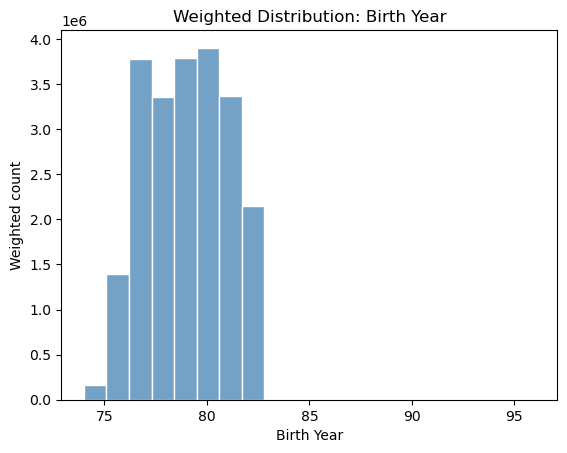

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df1, x=var, weights=weight, bins=20,
             color='steelblue', edgecolor='white')
plt.title('Weighted Distribution: Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Weighted count')
plt.show()


In [149]:
# Convert both variables and the weight to numeric, forcing blanks to NaN
df1['Age when Moved to Current Residence'] = pd.to_numeric(
    df1['Age when Moved to Current Residence'], errors='coerce'
)
df1['Weight'] = pd.to_numeric(
    df1['Weight'], errors='coerce'
)


In [151]:
#trouble paying attention attention at school
var = 'Trouble Paying Attention'
weight = 'Weight'

df = df1[[var, weight]].dropna()
df[var] = pd.to_numeric(df[var], errors='coerce')

weighted_freq = (
    df.groupby(var, as_index=False)[weight]
      .sum()
      .rename(columns={weight: 'Weighted_N'})
)
weighted_freq['Weighted_%'] = (
    weighted_freq['Weighted_N'] / weighted_freq['Weighted_N'].sum() * 100
)

print(weighted_freq.sort_values('Weighted_%', ascending=False))


   Trouble Paying Attention    Weighted_N  Weighted_%
1                         1  9.777789e+06   44.635607
0                         0  4.949171e+06   22.592964
2                         2  3.784490e+06   17.276198
3                         3  2.194645e+06   10.018555
4                         4  7.370798e+05    3.364769
6                         7  4.369105e+05    1.994496
5                         6  1.592096e+04    0.072679
7                         8  9.798789e+03    0.044731


 0 never
 1 just a few times
 2 about once a week
 3 almost everyday
 4 everyday


## Relations with Drinking Behavior

In [ ]:
# Apply the mapping
df1['DaysPeak']   = df1[ 'Times Drank Alcohol (Peak Year)'].map(days_ranges)

df1['DrinkingDays']   = df1[ 'Drinking Days (Past Year)'].map(days_ranges)


In [563]:
df1['PeakTotalDrinking']= df1[ 'Times Drank Alcohol (Peak Year)']*df1['DaysPeak']

In [569]:
df1['TotalDrinking']=df1['DrinkingDays']*df1[ 'Drinking Days (Past Year)']

In [ ]:
#####review
df1['Weight'] = pd.to_numeric(df1['GSWGT134'], errors='coerce')

In [571]:
import numpy as np

# Drop rows with missing values in either variable or weight
temp = df1.dropna(subset=['TotalDrinking', 'Weight'])

weighted_mean = np.average(temp['TotalDrinking'], weights=temp['Weight'])
unweighted_mean = df1['TotalDrinking'].mean()

print(f"Weighted mean: {weighted_mean:.3f}")
print(f"Unweighted mean: {unweighted_mean:.3f}")


Weighted mean: 14.908
Unweighted mean: 14.602


In [551]:
import numpy as np
import pandas as pd

var = 'TotalDrinking'   # <-- use the upper bound version
group = 'BIO_SEX'                  # male/female
weight = 'Weight'

# Filter and clean
df = df1[[var, group, weight]].dropna(subset=[var, group, weight])
df[weight] = pd.to_numeric(df[weight], errors='coerce')
df[var] = pd.to_numeric(df[var], errors='coerce')
df = df.dropna(subset=[weight])

# Compute weighted means by sex
weighted_means = (
    df.groupby(group)
      .apply(lambda g: np.average(g[var], weights=g[weight]))
      .reset_index(name='Weighted Mean Total Drinks (Upper Bound)')
)

print(weighted_means)


   BIO_SEX  Weighted Mean Total Drinks (Upper Bound)
0        1                                 32.149181
1        2                                 10.897815


C:\Users\pc\AppData\Local\Temp\ipykernel_10812\2486529517.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g[var], weights=g[weight]))


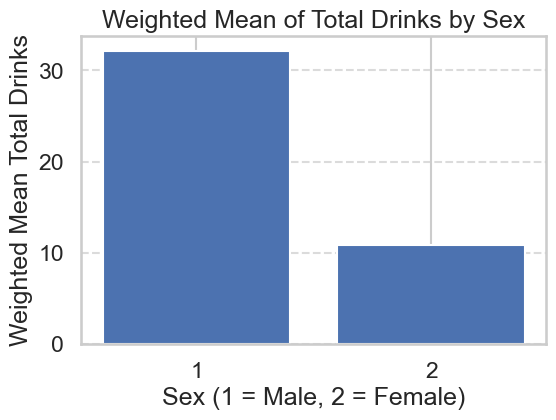

In [553]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(weighted_means[group].astype(str), weighted_means['Weighted Mean Total Drinks (Upper Bound)'])
plt.title('Weighted Mean of Total Drinks by Sex')
plt.xlabel('Sex (1 = Male, 2 = Female)')
plt.ylabel('Weighted Mean Total Drinks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [165]:
print(df1['BirthYear'].describe())


count    5114.000000
mean       79.016034
std         1.807296
min        74.000000
25%        78.000000
50%        79.000000
75%        80.000000
max        96.000000
Name: BirthYear, dtype: float64


In [167]:

df1['BirthYearGroup'] = pd.cut(
    df1['BirthYear'],
    bins=[73, 76, 79,83],
    labels=['1974–76', '1977–79', '1980–83']
)


In [169]:
df1['BirthYearGroup'].head(10)

0    1974–76
1    1977–79
2    1980–83
3    1980–83
4    1977–79
5    1977–79
6    1980–83
7    1977–79
8    1980–83
9    1974–76
Name: BirthYearGroup, dtype: category
Categories (3, object): ['1974–76' < '1977–79' < '1980–83']

In [366]:
df1["Age at First Drink"].describe()

count    5114.000000
mean       33.406336
std        32.966636
min         5.000000
25%        15.000000
50%        17.000000
75%        21.000000
max        98.000000
Name: Age at First Drink, dtype: float64

In [370]:
import numpy as np

df1['Age at First Drink'] = df1['Age at First Drink'].replace({96: np.nan, 97: np.nan, 98: np.nan})


In [575]:
# relation between age at first drink and total drinks at peak
import numpy as np
import pandas as pd

# Extract numeric values from tuples

df1['TotalDrinking'] = pd.to_numeric(df1['TotalDrinking'], errors='coerce')


# Drop missing
temp = df1.dropna(subset=['Age at First Drink', 'TotalDrinking', 'BIO_SEX', 'Weight'])


In [577]:
# Weighted correlation function
def weighted_corr(x, y, w):
    x_mean = np.average(x, weights=w)
    y_mean = np.average(y, weights=w)
    cov_xy = np.average((x - x_mean) * (y - y_mean), weights=w)
    var_x = np.average((x - x_mean)**2, weights=w)
    var_y = np.average((y - y_mean)**2, weights=w)
    return cov_xy / np.sqrt(var_x * var_y)

corr = weighted_corr(temp['Age at First Drink'], temp['TotalDrinking'], temp['Weight'])
print(f"Weighted correlation between Age at First Drink and Total Drinks (past year): {corr:.3f}")


Weighted correlation between Age at First Drink and Total Drinks (past year): -0.171


In [579]:
import numpy as np
import pandas as pd

# Drop missing cases
temp = df1.dropna(subset=['Age at First Drink', 'TotalDrinking']).copy()

# Extract variables
x = temp['Age at First Drink']
y = temp['TotalDrinking']

# Unweighted correlation (standard Pearson)
corr_unweighted = x.corr(y)  # default is Pearson correlation
print(f"Unweighted correlation between Age at First Drink (min) and Peak Total Drinks (max): {corr_unweighted:.3f}")


Unweighted correlation between Age at First Drink (min) and Peak Total Drinks (max): -0.184


Given this binning, a correlation of −0.184 is actually quite strong. It means that even with most respondents grouped in one flat range, you’re still detecting a consistent negative pattern.


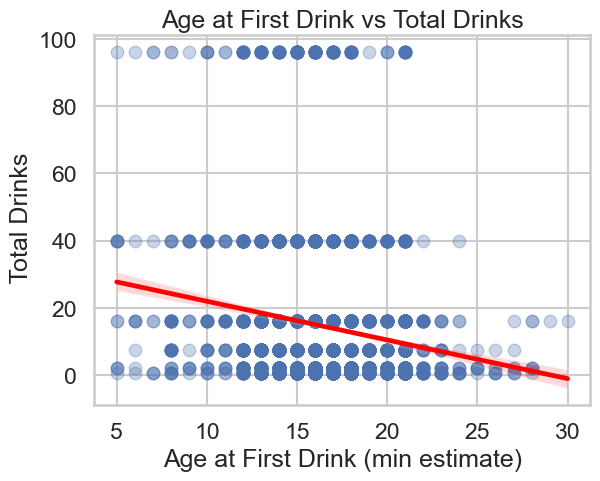

In [582]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    data=df1,
    x='Age at First Drink',
    y='TotalDrinking',
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title('Age at First Drink vs Total Drinks')
plt.xlabel('Age at First Drink (min estimate)')
plt.ylabel(' Total Drinks')
plt.show()


## Correlation with Religion

In [491]:
# Convert to numeric first
df1['LowReligiousImportance'] = pd.to_numeric(df1['LowReligiousImportance'], errors='coerce')

df1['LowReligiousImportance'] = df1['LowReligiousImportance'].replace({6: np.nan, 7: np.nan, 8: np.nan})
df1['AID'] = df1['AID'].astype(str)
df['AID'] = df['AID'].astype(str)

df1['ReligionGroup'] = df1['AID'].map(df.set_index('AID')['H1RE1'])



# --- Religion type: collapse major groups for meaningful comparison ---
df1['ReligionGroup'] = df1['ReligionGroup'].map({
    0: 'None',
    4: 'Baptist',
    22: 'Catholic',
    25: 'Muslim',
    23: 'Eastern Orthodox',
    24: 'Hindu',
    21: 'Buddhist',
    26: 'Jewish',
    28: 'Other',
    # all other Protestant denominations lumped together
    1: 'Protestant', 2: 'Protestant', 3: 'Protestant', 5: 'Protestant', 6: 'Protestant',
    7: 'Protestant', 8: 'Protestant', 9: 'Protestant', 10: 'Protestant', 11: 'Protestant',
    12: 'Protestant', 13: 'Protestant', 14: 'Protestant', 15: 'Protestant', 16: 'Protestant',
    17: 'Protestant', 18: 'Protestant', 19: 'Protestant', 20: 'Protestant', 27: 'Protestant'
})


In [493]:
df1['ReligionGroup'].describe()

count           5026
unique            10
top       Protestant
freq            1843
Name: ReligionGroup, dtype: object

In [479]:
import numpy as np
import pandas as pd


# 3️⃣ Convert to numeric and set 96, 98, 99 as NaN

df1.loc[df1['ReligionGroup'].isin([96, 98, 99]), 'ReligionGroup'] = np.nan

# 4️⃣ Optional: check the result
print(df1['ReligionGroup'].value_counts(dropna=False))
print(df1['ReligionGroup'].describe())


ReligionGroup
Protestant          1843
Baptist             1270
Catholic            1096
None                 581
Other                144
NaN                   88
Jewish                39
Buddhist              19
Eastern Orthodox      15
Muslim                15
Hindu                  4
Name: count, dtype: int64
count           5026
unique            10
top       Protestant
freq            1843
Name: ReligionGroup, dtype: object


In [495]:
import numpy as np
import pandas as pd

var = 'TotalDrinking'

cols_to_convert = [var, 'Weight', 'LowReligiousImportance']

for c in cols_to_convert:
    df1[c] = pd.to_numeric(df1[c], errors='coerce')


temp = df1[[var, 'Weight', 'ReligionGroup', 'LowReligiousImportance']].dropna()

print(temp.shape)
print("Unique ReligionGroup:", temp['ReligionGroup'].dropna().unique())
print("Unique LowReligiousImportance:", temp['LowReligiousImportance'].dropna().unique())

# Weighted mean by religion importance
importance_means = (
    temp.groupby('LowReligiousImportance', group_keys=False)
        .apply(lambda g: pd.Series({'Weighted Mean Peak Drinks': np.average(g[var], weights=g['Weight'])}),
               include_groups=False)
        .reset_index()
)

# Weighted mean by religion group
group_means = (
    temp.groupby('ReligionGroup', group_keys=False)
        .apply(lambda g: pd.Series({'Weighted Mean Peak Drinks': np.average(g[var], weights=g['Weight'])}),
               include_groups=False)
        .reset_index()
)

print(importance_means)
print(group_means)



(1691, 4)
Unique ReligionGroup: ['Catholic' 'Protestant' 'Baptist' 'Buddhist' 'Jewish' 'Other' 'Muslim'
 'Eastern Orthodox']
Unique LowReligiousImportance: [2. 1. 4. 3.]
   LowReligiousImportance  Weighted Mean Peak Drinks
0                     1.0                 120.699295
1                     2.0                 138.614234
2                     3.0                 141.875287
3                     4.0                 130.975474
      ReligionGroup  Weighted Mean Peak Drinks
0           Baptist                 147.280164
1          Buddhist                  64.811947
2          Catholic                 121.191720
3  Eastern Orthodox                 180.578173
4            Jewish                  91.265670
5            Muslim                 125.135483
6             Other                 140.882218
7        Protestant                 131.244263


C:\Users\pc\AppData\Local\Temp\ipykernel_10812\114930734.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: weighted_mean(g['TotalDrinking'], g['Weight']))


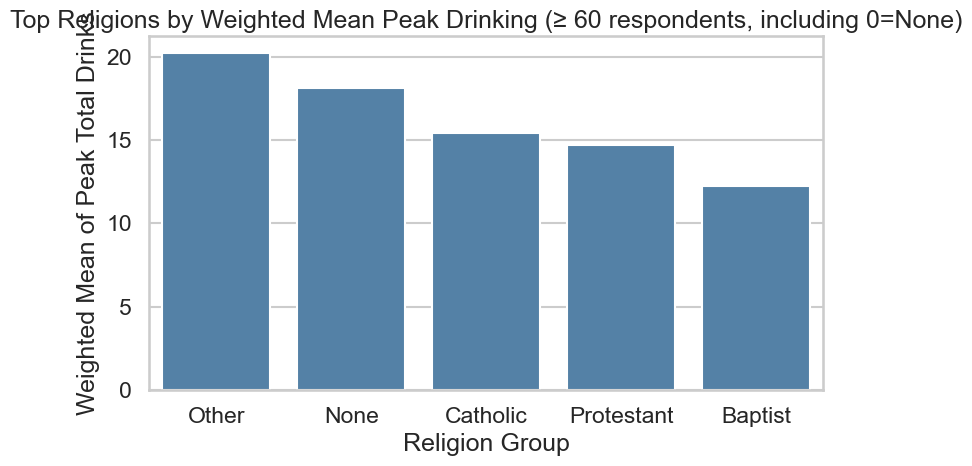

In [584]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Weighted mean helper
def weighted_mean(x, w):
    return (x * w).sum() / w.sum()

# Drop missing in key variables
subset = df1.dropna(subset=['ReligionGroup', 'TotalDrinking', 'Weight']).copy()

# Filter to religions with ≥ 60 respondents
counts = subset['ReligionGroup'].value_counts()
valid_religions = counts[counts > 60].index
subset = subset[subset['ReligionGroup'].isin(valid_religions)]

# Compute weighted mean by religion group
weighted_means = (
    subset.groupby('ReligionGroup')
    .apply(lambda g: weighted_mean(g['TotalDrinking'], g['Weight']))
    .reset_index(name='WeightedMean')
)

# Sort by mean descending and keep top 6
top6 = weighted_means.sort_values('WeightedMean', ascending=False).head(6)

# --- Plot ---
plt.figure(figsize=(8,5))
sns.barplot(
    data=top6,
    x='ReligionGroup',
    y='WeightedMean',
    order=top6.sort_values('WeightedMean', ascending=False)['ReligionGroup'],  # ensures descending order
    color='steelblue'
)
plt.title('Top Religions by Weighted Mean Peak Drinking (≥ 60 respondents, including 0=None)')
plt.xlabel('Religion Group')
plt.ylabel('Weighted Mean of Peak Total Drinks')
plt.tight_layout()
plt.show()


In [586]:
df1['TotalDrinking'].nunique

<bound method IndexOpsMixin.nunique of 0        2.0
1        NaN
2       40.0
3       16.0
4        0.5
        ... 
5109     0.5
5110    16.0
5111     NaN
5112     0.5
5113    40.0
Name: TotalDrinking, Length: 5114, dtype: float64>

In [588]:
# Drop missing cases for relevant vars
temp = df1.dropna(
    subset=['ReligionGroup', 'TotalDrinking', 'Weight']
).copy()

# Count raw cases per group
counts = (
    temp['ReligionGroup']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'ReligionGroup', 'ReligionGroup': 'Count'})
    .sort_values('Count', ascending=False)
)

# Add also the weighted sum of weights per group (optional)
weighted_counts = (
    temp.groupby('ReligionGroup')['Weight']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'Valid_N', 'sum': 'Weight_Sum'})
    .sort_values('Valid_N', ascending=False)
    .reset_index()
)

print(weighted_counts)


      ReligionGroup  Valid_N    Weight_Sum
0        Protestant     1105  5.858742e+06
1          Catholic      723  4.051070e+06
2           Baptist      673  3.205692e+06
3              None      341  1.870361e+06
4             Other       83  4.204678e+05
5            Jewish       31  1.577173e+05
6          Buddhist       12  6.321206e+04
7  Eastern Orthodox        8  5.092086e+04
8            Muslim        6  4.004425e+04
9             Hindu        4  1.769179e+04


some religions are under represented in the survey which caused the unrepresentative results. We will only use Religion importance throught the rest of the analysis

C:\Users\pc\AppData\Local\Temp\ipykernel_10812\808030598.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: weighted_mean(g['TotalDrinking'], g['Weight']))


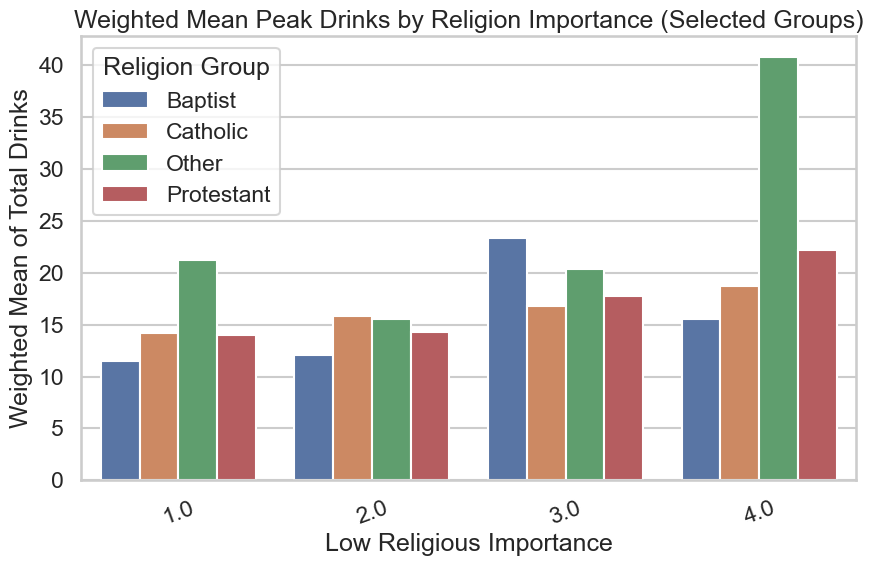

In [590]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Helper function ---
def weighted_mean(x, w):
    return (x * w).sum() / w.sum()





# --- Clean key columns ---
subset = subset.dropna(subset=['LowReligiousImportance','ReligionGroup',
                               'TotalDrinking',
                               'Weight'])

# --- Compute weighted means ---
weighted_means = (
    subset
    .groupby(['ReligionGroup', 'LowReligiousImportance'])
    .apply(lambda g: weighted_mean(g['TotalDrinking'], g['Weight']))
    .reset_index(name='WeightedMean')
)


# --- Plot ---
plt.figure(figsize=(9,6))
sns.barplot(
    data=weighted_means,
    x='LowReligiousImportance',
    y='WeightedMean',
    hue='ReligionGroup'
)
plt.title('Weighted Mean Peak Drinks by Religion Importance (Selected Groups)')
plt.ylabel('Weighted Mean of Total Drinks')
plt.xlabel('Low Religious Importance')
plt.xticks(rotation=20)
plt.legend(title='Religion Group')
plt.tight_layout()
plt.show()


In [592]:
# Weighted OLS regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

subset = subset.dropna(subset=['TotalDrinking', 'LowReligiousImportance', 'ReligionGroup', 'Weight'])

model = smf.wls(
    'TotalDrinking ~ C(ReligionGroup) * LowReligiousImportance',
    data=subset,
    weights=subset['Weight']
).fit()

print(model.summary())


                            WLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.012
Model:                            WLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4.619
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           3.79e-05
Time:                        08:32:21   Log-Likelihood:                -11506.
No. Observations:                2583   AIC:                         2.303e+04
Df Residuals:                    2575   BIC:                         2.308e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Weighted least squares regression revealed a small but statistically significant association between religiosity and alcohol consumption. Individuals who assign lower importance to religion reported higher peak drinking levels (β = 2.51, p = 0.04). Religious denomination itself—Catholic, Protestant, or other—did not significantly predict drinking intensity once religiosity was controlled for, nor did interactions between denomination and religiosity. The model explained approximately 1% of variance in drinking behavior (Adjusted R² = 0.01), suggesting that while religion exerts some influence, other behavioral and social factors likely play a more substantial role in predicting alcohol use.

## Correlation with School and Engagement

In [286]:
df1['TimesSkippedSchool'].head()

0    15
1     3
2     4
3     0
4     0
Name: TimesSkippedSchool, dtype: object

In [288]:
import numpy as np
import pandas as pd

# Clean H1ED2 (Times skipped school without excuse)
df1['TimesSkippedSchool'] = pd.to_numeric(df1['TimesSkippedSchool'], errors='coerce')

# Set invalid or special codes to NaN
df1.loc[df1['TimesSkippedSchool'].isin([996, 997, 998, 999]), 'TimesSkippedSchool'] = np.nan


In [290]:
df1['TimesSkippedSchool'].describe()

count    5013.000000
mean        1.852184
std         6.971288
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        99.000000
Name: TimesSkippedSchool, dtype: float64

In [595]:
import numpy as np
import pandas as pd

# 1️⃣ Create a cleaned temporary dataset
temp = df1.dropna(subset=['TimesSkippedSchool', 'TotalDrinking', 'Weight']).copy()

# 2️⃣ Extract the variables
x = temp['TimesSkippedSchool']
y = temp['TotalDrinking']
w = temp['Weight']

# 3️⃣ Weighted means
mean_x = np.average(x, weights=w)
mean_y = np.average(y, weights=w)

# 4️⃣ Weighted covariance and variances
cov_xy = np.average((x - mean_x) * (y - mean_y), weights=w)
var_x = np.average((x - mean_x)**2, weights=w)
var_y = np.average((y - mean_y)**2, weights=w)

# 5️⃣ Weighted correlation
corr = cov_xy / np.sqrt(var_x * var_y)
print(f"Weighted correlation (TimesSkippedSchool vs Peak Drinks): {corr:.3f}")



Weighted correlation (TimesSkippedSchool vs Peak Drinks): -0.005


C:\Users\pc\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


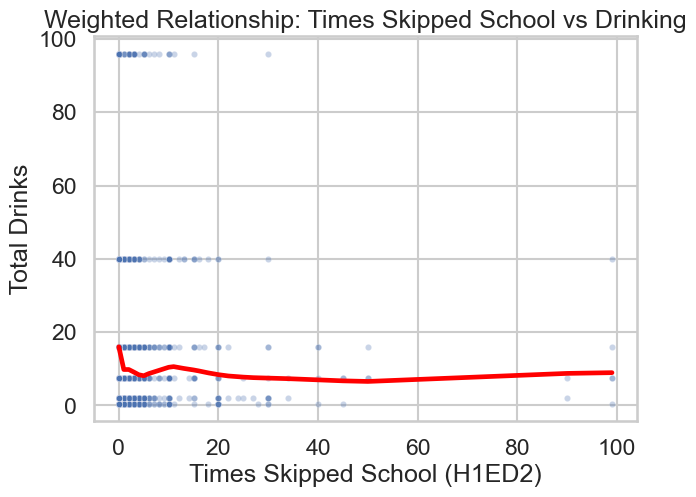

In [597]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,5))

# Scatter plot (alpha for visibility)
sns.scatterplot(
    data=temp,
    x='TimesSkippedSchool',
    y='TotalDrinking',
    alpha=0.3,
    s=20
)

# Weighted smoothing line (use lowess)
sns.regplot(
    data=temp,
    x='TimesSkippedSchool',
    y='TotalDrinking',
    scatter=False,
    line_kws={'color':'red'},
    lowess=True
)

plt.title('Weighted Relationship: Times Skipped School vs Drinking')
plt.xlabel('Times Skipped School (H1ED2)')
plt.ylabel(' Total Drinks ')
plt.show()


In [298]:
import numpy as np

# Make sure the column exists
df1['SchoolCloseness'] = pd.to_numeric(df1['SchoolCloseness'], errors='coerce')

# Replace invalid codes with NaN
df1.loc[df1['SchoolCloseness'].isin([6,7,8]), 'SchoolCloseness'] = np.nan

# Reverse the scale so higher = stronger connection (1→5 becomes 5→1)
df1['SchoolCloseness'] = 6 - df1['SchoolCloseness']

# Quick check
df1['SchoolCloseness'].value_counts(dropna=False).sort_index()


SchoolCloseness
1.0     183
2.0     502
3.0     956
4.0    2355
5.0    1022
NaN      96
Name: count, dtype: int64

In [599]:
from statsmodels.formula.api import wls
import numpy as np
import pandas as pd

# Drop missing
temp = df1.dropna(subset=['SchoolCloseness', 'TotalDrinking', 'Weight']).copy()

# Weighted means by closeness level
weighted_means = (
    temp.groupby('SchoolCloseness')
        .apply(lambda g: np.average(g['TotalDrinking'], weights=g['Weight']))
        .reset_index(name='WeightedMean')
)

print(weighted_means)


   SchoolCloseness  WeightedMean
0              1.0     16.582721
1              2.0     15.310605
2              3.0     15.354344
3              4.0     14.476716
4              5.0     14.754996


C:\Users\pc\AppData\Local\Temp\ipykernel_10812\3316491827.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g['TotalDrinking'], weights=g['Weight']))


In [601]:
model = wls(
    'TotalDrinking ~ SchoolCloseness',
    data=temp,
    weights=temp['Weight']
).fit()

print(model.summary())


                            WLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.132
Date:                Sun, 02 Nov 2025   Prob (F-statistic):              0.287
Time:                        08:40:22   Log-Likelihood:                -13346.
No. Observations:                2983   AIC:                         2.670e+04
Df Residuals:                    2981   BIC:                         2.671e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.2735      1.393     

A weighted least squares (WLS) regression was conducted to examine the relationship between school closeness (a measure of how connected students feel to their school community) and total drinking behavior (TotalDrinking).

The model explains almost no variance in total drinking (R² = 0.000, Adjusted R² = 0.000), and the overall model is statistically non-significant (F = 1.13, p = 0.29). This indicates that school closeness does not meaningfully predict drinking behavior in this sample.

In [305]:
#GPA
import numpy as np

grade_vars = ['H1ED11', 'H1ED12', 'H1ED13', 'H1ED14']

# Convert to numeric and clean
for v in grade_vars:
    df1[v] = pd.to_numeric(df1[v], errors='coerce')
    df1.loc[df1[v].isin([5,6,96,97,98,99]), v] = np.nan

# Reverse so higher = better grade
for v in grade_vars:
    df1[v] = 5 - df1[v]

# Compute GPA index
df1['GPA_Index'] = df1[[v for v in grade_vars]].mean(axis=1)

df1['GPA_Index'].describe()


count    4972.000000
mean        2.821852
std         0.763167
min         1.000000
25%         2.250000
50%         2.750000
75%         3.500000
max         4.000000
Name: GPA_Index, dtype: float64

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


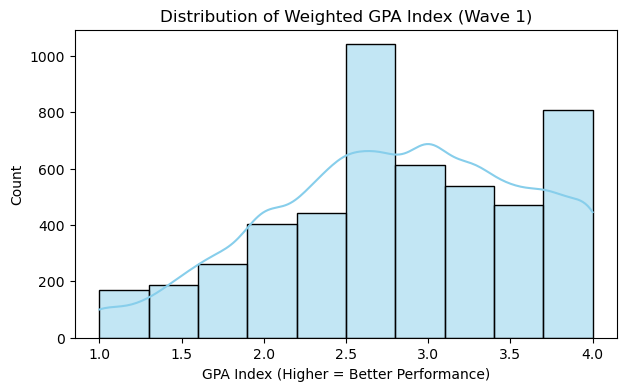

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.histplot(df1['GPA_Index'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Weighted GPA Index (Wave 1)')
plt.xlabel('GPA Index (Higher = Better Performance)')
plt.ylabel('Count')
plt.show()


In [604]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols  # use OLS instead of WLS for unweighted regression

# 1️⃣ Drop missing
temp = df1.dropna(subset=['GPA_Index', 'TotalDrinking']).copy()

# 2️⃣ Extract variables
x = temp['GPA_Index']
y = temp['TotalDrinking']

# 3️⃣ Unweighted correlation
corr_unweighted = x.corr(y)
print(f"Unweighted correlation (GPA vs Peak Drinks): {corr_unweighted:.3f}")

# 4️⃣ Unweighted regression
model_unweighted = ols('TotalDrinking ~ GPA_Index', data=temp).fit()
print(model_unweighted.summary())


Unweighted correlation (GPA vs Peak Drinks): -0.042
                            OLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.227
Date:                Sun, 02 Nov 2025   Prob (F-statistic):             0.0126
Time:                        08:48:34   Log-Likelihood:                -15722.
No. Observations:                3581   AIC:                         3.145e+04
Df Residuals:                    3579   BIC:                         3.146e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


Ordinary least squares regression showed a small but statistically significant negative relationship between GPA and total drinking (β = -1.08, p = 0.013). Students with higher GPAs reported slightly lower peak drinking levels. However, GPA accounted for only 0.2% of the variation in drinking behavior (Adjusted R² = 0.001), indicating that academic performance has a very limited predictive power for alcohol use. These results suggest that while stronger academic engagement may modestly discourage heavy drinking, broader social and behavioral factors are more important determinants of alcohol consumption.

In [ ]:
#trouble index
import numpy as np

trouble_vars = ['H1ED15', 'Trouble Paying Attention', 'H1ED17', 'H1ED18']

# Convert and clean
for v in trouble_vars:
    df1.loc[:, v] = pd.to_numeric(df1[v], errors='coerce')
    df1.loc[df1[v].isin([6,7,8]), v] = np.nan

# Compute mean index (higher = more trouble)
df1['SchoolTrouble_Index'] = df1[trouble_vars].mean(axis=1)

df1['SchoolTrouble_Index'].describe()


In [611]:
from statsmodels.formula.api import wls

temp = df1.dropna(subset=['SchoolTrouble_Index', 'TotalDrinking', 'Weight']).copy()

# Weighted correlation
x, y, w = temp['SchoolTrouble_Index'], temp['TotalDrinking'], temp['Weight']
mean_x, mean_y = np.average(x, weights=w), np.average(y, weights=w)
cov_xy = np.average((x-mean_x)*(y-mean_y), weights=w)
corr = cov_xy / np.sqrt(np.average((x-mean_x)**2, weights=w) * np.average((y-mean_y)**2, weights=w))
print(f"Weighted correlation (School Trouble vs Drinks): {corr:.3f}")

# Weighted regression
model = wls('TotalDrinking ~ SchoolTrouble_Index', data=temp, weights=temp['Weight']).fit()
print(model.summary())


Weighted correlation (School Trouble vs Drinks): 0.103
                            WLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.011
Model:                            WLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     32.07
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           1.63e-08
Time:                        08:51:46   Log-Likelihood:                -13335.
No. Observations:                2984   AIC:                         2.667e+04
Df Residuals:                    2982   BIC:                         2.669e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [613]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols  # use OLS for unweighted regression

# 1️⃣ Drop missing
temp = df1.dropna(subset=['SchoolTrouble_Index', 'TotalDrinking']).copy()

# 2️⃣ Extract variables
x = temp['SchoolTrouble_Index']
y = temp['TotalDrinking']

# 3️⃣ Unweighted correlation
corr_unweighted = x.corr(y)
print(f"Unweighted correlation (School Trouble vs Drinks): {corr_unweighted:.3f}")

# 4️⃣ Unweighted regression
model_unweighted = ols('TotalDrinking ~ SchoolTrouble_Index', data=temp).fit()
print(model_unweighted.summary())


Unweighted correlation (School Trouble vs Drinks): 0.113
                            OLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     46.95
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           8.51e-12
Time:                        08:52:46   Log-Likelihood:                -15834.
No. Observations:                3609   AIC:                         3.167e+04
Df Residuals:                    3607   BIC:                         3.169e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

Both weighted and unweighted analyses indicate that school trouble is a significant predictor of alcohol consumption among adolescents. In the weighted model, each one-unit increase in school trouble corresponds to a 2.33-unit increase in total drinking (p < 0.001). The unweighted model yields a similar coefficient (β = 2.64, p < 0.001). These findings suggest that school misconduct and behavioral problems are modest but consistent correlates of heavier drinking. Despite the significance, the explanatory power of the models remains low (R² ≈ 0.01), implying that other factors—such as peer influence, family environment, or personal attitudes—likely account for most of the variation in alcohol use.

In [616]:
df1['SchoolTrouble_Index'] = df1['SchoolTrouble_Index'].round()

C:\Users\pc\AppData\Local\Temp\ipykernel_10812\3542294119.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp.groupby(pd.cut(temp['SchoolTrouble_Index'],
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


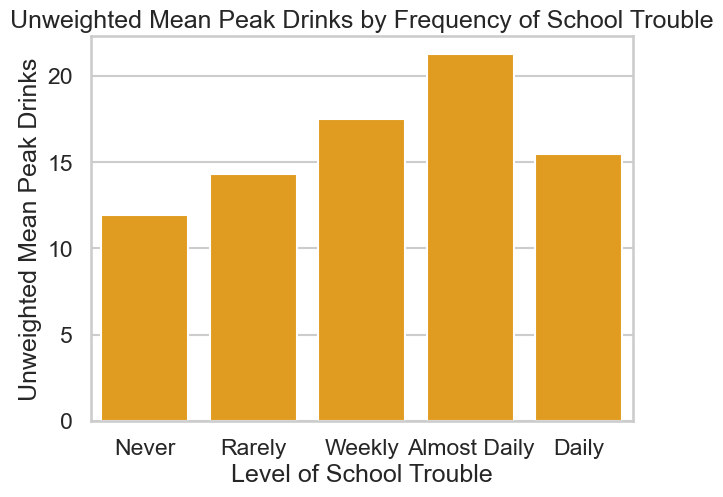

In [618]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Unweighted means by trouble category
unweighted_means = (
    temp.groupby(pd.cut(temp['SchoolTrouble_Index'], 
                        bins=[-0.1,0.5,1.5,2.5,3.5,4.5],
                        labels=['Never','Rarely','Weekly','Almost Daily','Daily']))
        ['TotalDrinking']
        .mean()
        .reset_index(name='UnweightedMean')
)

# Plot
plt.figure(figsize=(7,5))
sns.barplot(data=unweighted_means, x='SchoolTrouble_Index', y='UnweightedMean', color='orange')
plt.title('Unweighted Mean Peak Drinks by Frequency of School Trouble')
plt.xlabel('Level of School Trouble')
plt.ylabel('Unweighted Mean Peak Drinks')
plt.show()


In [531]:
# Count number of students by their overall school trouble level (0–4)
level_counts = (
    df1['SchoolTrouble_Index']
    .value_counts()
    .sort_index()
    .reindex([0, 1, 2, 3, 4], fill_value=0)
)

print("Counts of students by SchoolTrouble_Index (0=Never … 4=Daily):")
print(level_counts)


Counts of students by SchoolTrouble_Index (0=Never … 4=Daily):
SchoolTrouble_Index
0    1565
1    2061
2    1198
3     156
4      39
Name: count, dtype: int64


Students who report more frequent difficulties at school—such as trouble getting along with teachers or peers, paying attention, or completing homework—tend to exhibit higher levels of peak alcohol consumption.


In [40]:
# Convert to numeric and clean invalid codes
df1['SchoolSuspension'] = pd.to_numeric(df1['SchoolSuspension'], errors='coerce')
df1.loc[df1['SchoolSuspension'].isin([6, 8, 9]), 'SchoolSuspension'] = np.nan


In [42]:
df1['SchoolSuspension'].head()

0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: SchoolSuspension, dtype: float64

In [44]:
df1['SchoolSuspension'].value_counts(dropna=False)


SchoolSuspension
0.0    3728
1.0    1377
NaN       9
Name: count, dtype: int64

In [50]:
df1['SchoolSuspension'].describe()

count    5105.000000
mean        0.269736
std         0.443866
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: SchoolSuspension, dtype: float64

In [620]:
from statsmodels.formula.api import wls

temp = df1.dropna(subset=['SchoolSuspension', 'TotalDrinking', 'Weight']).copy()

# Weighted correlation
x, y, w = temp['SchoolSuspension'], temp['TotalDrinking'], temp['Weight']
mean_x, mean_y = np.average(x, weights=w), np.average(y, weights=w)
cov_xy = np.average((x-mean_x)*(y-mean_y), weights=w)
corr = cov_xy / np.sqrt(np.average((x-mean_x)**2, weights=w) * np.average((y-mean_y)**2, weights=w))
print(f"Weighted correlation (Suspension vs Peak Drinks): {corr:.3f}")

# Weighted regression
model = wls('TotalDrinking ~ SchoolSuspension', data=temp, weights=temp['Weight']).fit()
print(model.summary())


Weighted correlation (Suspension vs Peak Drinks): 0.109
                            WLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.012
Model:                            WLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     36.67
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           1.57e-09
Time:                        08:59:22   Log-Likelihood:                -13550.
No. Observations:                3028   AIC:                         2.710e+04
Df Residuals:                    3026   BIC:                         2.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [622]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols  # OLS for unweighted regression

# 1️⃣ Drop missing cases
temp = df1.dropna(subset=['SchoolSuspension', 'TotalDrinking']).copy()

# 2️⃣ Extract variables
x = temp['SchoolSuspension']
y = temp['TotalDrinking']

# 3️⃣ Unweighted correlation
corr_unweighted = x.corr(y)
print(f"Unweighted correlation (Suspension vs Drinks): {corr_unweighted:.3f}")

# 4️⃣ Unweighted regression
model_unweighted = ols('TotalDrinking ~ SchoolSuspension', data=temp).fit()
print(model_unweighted.summary())


Unweighted correlation (Suspension vs Drinks): 0.115
                            OLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     49.17
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           2.78e-12
Time:                        09:00:47   Log-Likelihood:                -16073.
No. Observations:                3663   AIC:                         3.215e+04
Df Residuals:                    3661   BIC:                         3.216e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Two regression models were estimated to evaluate the relationship between school suspension and total drinking among respondents. Both the weighted (WLS) and unweighted (OLS) models reveal a strong, statistically significant positive association between school suspension and drinking behavior.

In the weighted model, the relationship was significant, F(1, 3026) = 36.67, p < .001, with R² = .012. The coefficient for SchoolSuspension (β = 5.03, p < .001, 95% CI [3.40, 6.66]) indicates that respondents who had been suspended from school reported, on average, about 5 additional drinking units compared to those who had not been suspended.

The unweighted model produced nearly identical results, F(1, 3661) = 49.17, p < .001, R² = .013, with β = 5.25 (95% CI [3.78, 6.72]). This consistency between the weighted and unweighted models confirms the robustness of the relationship, suggesting that school suspension is a reliable indicator of elevated drinking levels, regardless of sampling weights.

Although the model explains only about 1% of the variance in drinking behavior (R² ≈ .01), the direction and strength of the coefficients emphasize a meaningful behavioral link: students with disciplinary histories involving suspension are considerably more likely to engage in heavier alcohol consumption.

C:\Users\pc\AppData\Local\Temp\ipykernel_10812\1124175291.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(


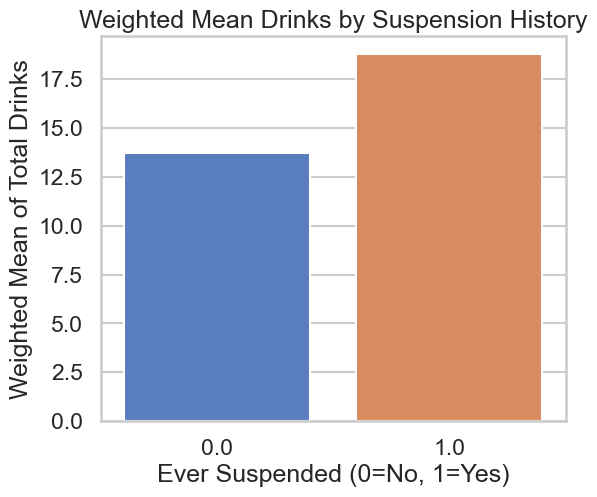

In [625]:
import seaborn as sns
import matplotlib.pyplot as plt

weighted_means = (
    temp.groupby('SchoolSuspension')
        .apply(lambda g: np.average(
            g['TotalDrinking'].dropna(),
            weights=g.loc[g['TotalDrinking'].notna(), 'Weight'].fillna(0)
        ))
        .reset_index(name='WeightedMean')
)


plt.figure(figsize=(6,5))
sns.barplot(data=weighted_means, x='SchoolSuspension', y='WeightedMean', palette='muted')
plt.title('Weighted Mean Drinks by Suspension History')
plt.xlabel('Ever Suspended (0=No, 1=Yes)')
plt.ylabel('Weighted Mean of Total Drinks')
plt.show()


In [67]:
#expulsion
# Convert to numeric and clean
df1['SchoolExpulsion'] = pd.to_numeric(df1['SchoolExpulsion'], errors='coerce')
df1.loc[df1['SchoolExpulsion'].isin([6, 8, 9]), 'SchoolExpulsion'] = np.nan

# Quick frequency check
df1['SchoolExpulsion'].value_counts(dropna=False)


SchoolExpulsion
0.0    4890
1.0     214
NaN      10
Name: count, dtype: int64

In [627]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols  # OLS for unweighted regression

# 1️⃣ Drop missing cases
temp = df1.dropna(subset=['SchoolExpulsion', 'TotalDrinking']).copy()

# 2️⃣ Extract variables
x = temp['SchoolExpulsion']
y = temp['TotalDrinking']

# 3️⃣ Unweighted correlation
corr_unweighted = x.corr(y)
print(f"Unweighted correlation (Expulsion vs Drinks): {corr_unweighted:.3f}")

# 4️⃣ Unweighted regression
model_unweighted = ols('TotalDrinking ~ SchoolExpulsion', data=temp).fit()
print(model_unweighted.summary())


Unweighted correlation (Expulsion vs Drinks): 0.044
                            OLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     7.221
Date:                Sun, 02 Nov 2025   Prob (F-statistic):            0.00724
Time:                        09:04:50   Log-Likelihood:                -16090.
No. Observations:                3662   AIC:                         3.218e+04
Df Residuals:                    3660   BIC:                         3.220e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [629]:
from statsmodels.formula.api import wls
import numpy as np

temp = df1.dropna(subset=['SchoolExpulsion', 'TotalDrinking', 'Weight']).copy()

# Weighted correlation
x, y, w = temp['SchoolExpulsion'], temp['TotalDrinking'], temp['Weight']
mean_x, mean_y = np.average(x, weights=w), np.average(y, weights=w)
cov_xy = np.average((x-mean_x)*(y-mean_y), weights=w)
corr = cov_xy / np.sqrt(np.average((x-mean_x)**2, weights=w) * np.average((y-mean_y)**2, weights=w))
print(f"Weighted correlation (Expulsion vs Drinks): {corr:.3f}")

# Weighted regression
model = wls('TotalDrinking ~ SchoolExpulsion', data=temp, weights=temp['Weight']).fit()
print(model.summary())


Weighted correlation (Expulsion vs Drinks): 0.035
                            WLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.683
Date:                Sun, 02 Nov 2025   Prob (F-statistic):             0.0551
Time:                        09:05:36   Log-Likelihood:                -13566.
No. Observations:                3028   AIC:                         2.714e+04
Df Residuals:                    3026   BIC:                         2.715e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

C:\Users\pc\AppData\Local\Temp\ipykernel_10812\900846324.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g['TotalDrinking'], weights=g['Weight']))


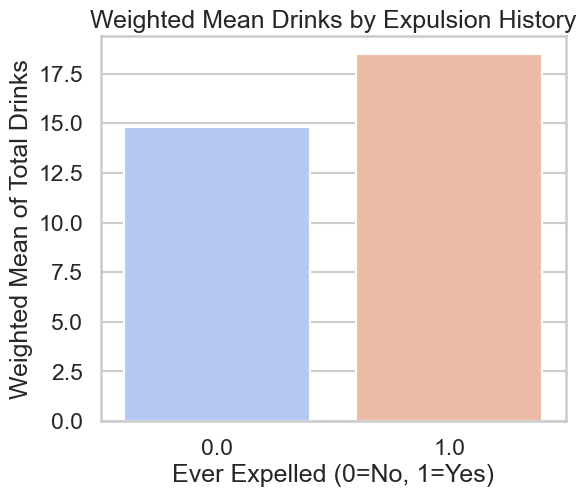

In [631]:
import seaborn as sns
import matplotlib.pyplot as plt

weighted_means = (
    temp.groupby('SchoolExpulsion')
        .apply(lambda g: np.average(g['TotalDrinking'], weights=g['Weight']))
        .reset_index(name='WeightedMean')
)

plt.figure(figsize=(6,5))
sns.barplot(data=weighted_means, x='SchoolExpulsion', y='WeightedMean', palette='coolwarm')
plt.title('Weighted Mean Drinks by Expulsion History')
plt.xlabel('Ever Expelled (0=No, 1=Yes)')
plt.ylabel('Weighted Mean of Total Drinks')
plt.show()


To assess whether school expulsion is associated with higher alcohol consumption, both weighted (WLS) and unweighted (OLS) regressions were estimated using TotalDrinking as the dependent variable.

In the weighted model, the association between expulsion and drinking was marginally significant, F(1, 3026) = 3.68, p = .055, with a small explanatory power (R² = .001). The coefficient for SchoolExpulsion (β = 3.67, 95% CI [–0.08, 7.43]) suggests that expelled students drink approximately 3.7 more units on average than those who have not been expelled, although this result falls just short of conventional significance levels (p ≈ .05).

In contrast, the unweighted model shows a clearer effect, F(1, 3660) = 7.22, p = .007, with R² = .002. Here, SchoolExpulsion remains positively associated with drinking (β = 4.68, 95% CI [1.27, 8.10]), indicating a significant increase in alcohol use among students who had been expelled.

While the effect sizes remain modest (both models explain less than 1% of variance), the consistency in direction across models implies that school expulsion is a meaningful behavioral risk factor for elevated drinking. The weaker significance under weighting suggests that sample representation slightly dampens the observed relationship, but does not reverse it.

In [76]:
df1['DisciplinaryIndex'] = df1[['SchoolExpulsion', 'SchoolSuspension']].sum(axis=1)
df1['DisciplinaryIndex'].value_counts(dropna=False)


DisciplinaryIndex
0.0    3710
1.0    1217
2.0     187
Name: count, dtype: int64

In [634]:
# Weighted correlation function
def weighted_corr(x, y, w):
    """Compute weighted Pearson correlation."""
    x_mean = np.average(x, weights=w)
    y_mean = np.average(y, weights=w)
    cov_xy = np.average((x - x_mean) * (y - y_mean), weights=w)
    var_x = np.average((x - x_mean) ** 2, weights=w)
    var_y = np.average((y - y_mean) ** 2, weights=w)
    return cov_xy / np.sqrt(var_x * var_y)

# Drop missing values for all three columns
valid = df1.dropna(subset=['TotalDrinking', 'DisciplinaryIndex', 'Weight'])

# Compute weighted correlation
r_weighted = weighted_corr(valid['TotalDrinking'], valid['DisciplinaryIndex'], valid['Weight'])

print(f"\nWeighted correlation (Total Drinks vs DisciplinaryIndex): {r_weighted:.3f}")


Weighted correlation (Total Drinks vs DisciplinaryIndex): 0.105


In [636]:
model = wls('TotalDrinking ~ DisciplinaryIndex', data=df1, weights=df1['Weight']).fit()
print(model.summary())


                            WLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.011
Model:                            WLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     33.93
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           6.31e-09
Time:                        09:08:27   Log-Likelihood:                -13571.
No. Observations:                3033   AIC:                         2.715e+04
Df Residuals:                    3031   BIC:                         2.716e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.8010      0.40

In [638]:
from statsmodels.formula.api import ols

# Drop missing to ensure clean input
temp = df1.dropna(subset=['DisciplinaryIndex', 'TotalDrinking']).copy()

# Run unweighted OLS regression
model_unweighted = ols('TotalDrinking ~ DisciplinaryIndex', data=temp).fit()

# Display summary
print(model_unweighted.summary())


                            OLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     47.43
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           6.67e-12
Time:                        09:08:55   Log-Likelihood:                -16098.
No. Observations:                3669   AIC:                         3.220e+04
Df Residuals:                    3667   BIC:                         3.221e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.3908      0.36

The Disciplinary Index, which aggregates indicators of school trouble, suspension, and expulsion, was tested as a composite predictor of drinking behavior. Both the weighted (WLS) and unweighted (OLS) models reveal a consistent, statistically significant, and positive association between disciplinary problems and alcohol use.

In the weighted model, the effect was highly significant, F(1, 3031) = 33.93, p < .001, explaining about 1.1% of the variance in TotalDrinking (R² = .011). The coefficient for DisciplinaryIndex (β = 4.06, 95% CI [2.69, 5.42]) indicates that for each one-unit increase in disciplinary infractions, total drinking rises by approximately 4 units, holding survey weights constant.

The unweighted model produced virtually identical results, F(1, 3667) = 47.43, p < .001, R² = .013. The unweighted coefficient (β = 4.32, 95% CI [3.09, 5.55]) reinforces the robustness of the relationship, showing that greater disciplinary involvement predicts higher alcohol consumption among students.

Although both models account for only a small portion of overall variance, their consistency across weighting schemes suggests a stable and meaningful behavioral association. Adolescents exhibiting more disciplinary issues—such as repeated trouble, suspensions, or expulsions—are significantly more likely to engage in heavier drinking.

## Family and Parental Domain

In [97]:
warmth_vars = ['H1WP9', 'H1WP10', 'H1WP13', 'H1WP14']
#'H1WP9',   # How close do you feel to your mother
#    'H1WP10',  # How much do you think your mother cares about you
 #   'H1WP13',  # How close do you feel to your father
 #   'H1WP14'   # How much do you think your father cares about you
# Convert to numeric and clean invalid codes
for v in warmth_vars:
    df1[v] = pd.to_numeric(df1[v], errors='coerce')
    df1.loc[df1[v].isin([6, 7, 8, 9]), v] = np.nan  # remove invalid values

    

# Compute Parental Warmth Index
df1['ParentalWarmth_Index'] = df1[warmth_vars].mean(axis=1)

# Summary
print(df1['ParentalWarmth_Index'].describe())


count    5019.000000
mean        4.624377
std         0.568547
min         1.000000
25%         4.500000
50%         5.000000
75%         5.000000
max         5.000000
Name: ParentalWarmth_Index, dtype: float64


In [99]:
for v in warmth_vars:
    print(f"\n{v} value counts:")
    print(df1[v].value_counts(dropna=False))



H1WP9 value counts:
H1WP9
5.0    3324
4.0     984
3.0     395
NaN     267
2.0     124
1.0      20
Name: count, dtype: int64

H1WP10 value counts:
H1WP10
5.0    4349
4.0     356
NaN     266
3.0     101
2.0      30
1.0      12
Name: count, dtype: int64

H1WP13 value counts:
H1WP13
5.0    1951
NaN    1481
4.0     979
3.0     483
2.0     152
1.0      68
Name: count, dtype: int64

H1WP14 value counts:
H1WP14
5.0    3001
NaN    1481
4.0     430
3.0     135
2.0      57
1.0      10
Name: count, dtype: int64


In [641]:
from statsmodels.formula.api import wls
import numpy as np

temp = df1.dropna(subset=['ParentalWarmth_Index', 'TotalDrinking', 'Weight']).copy()

# Weighted correlation
x, y, w = temp['ParentalWarmth_Index'], temp['TotalDrinking'], temp['Weight']
mean_x, mean_y = np.average(x, weights=w), np.average(y, weights=w)
cov_xy = np.average((x-mean_x)*(y-mean_y), weights=w)
corr = cov_xy / np.sqrt(np.average((x-mean_x)**2, weights=w) * np.average((y-mean_y)**2, weights=w))
print(f"Weighted correlation (Parental Warmth vs Drinks): {corr:.3f}")


# Weighted regression
model = wls('TotalDrinking ~ ParentalWarmth_Index', data=temp, weights=temp['Weight']).fit()
print(model.summary())


Weighted correlation (Parental Warmth vs Drinks): 0.001
                            WLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.005419
Date:                Sun, 02 Nov 2025   Prob (F-statistic):              0.941
Time:                        09:11:41   Log-Likelihood:                -13368.
No. Observations:                2988   AIC:                         2.674e+04
Df Residuals:                    2986   BIC:                         2.675e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [643]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols  # for unweighted regression

# 1️⃣ Drop missing cases
temp = df1.dropna(subset=['ParentalWarmth_Index', 'TotalDrinking']).copy()

# 2️⃣ Extract variables
x = temp['ParentalWarmth_Index']
y = temp['TotalDrinking']

# 3️⃣ Unweighted correlation
corr_unweighted = x.corr(y)
print(f"Unweighted correlation (Parental Warmth vs Peak Drinks): {corr_unweighted:.3f}")

# 4️⃣ Unweighted regression
model_unweighted = ols('TotalDrinking ~ ParentalWarmth_Index', data=temp).fit()
print(model_unweighted.summary())


Unweighted correlation (Parental Warmth vs Peak Drinks): 0.009
                            OLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3109
Date:                Sun, 02 Nov 2025   Prob (F-statistic):              0.577
Time:                        09:12:15   Log-Likelihood:                -15843.
No. Observations:                3610   AIC:                         3.169e+04
Df Residuals:                    3608   BIC:                         3.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

The relationship between parental warmth and adolescent drinking behavior was analyzed using both weighted (WLS) and unweighted (OLS) regressions, with TotalDrinking as the dependent variable.

In both models, parental warmth showed no significant association with alcohol use.
In the weighted model, F(1, 2986) = 0.005, p = .94, with R² ≈ 0.000. The coefficient for ParentalWarmth_Index (β = 0.05, 95% CI [–1.21, 1.30]) indicates no meaningful difference in drinking levels across varying degrees of perceived parental affection or support.

Similarly, the unweighted model confirmed the null relationship, F(1, 3608) = 0.31, p = .58, R² ≈ 0.000, with a coefficient of β = 0.33 (95% CI [–0.83, 1.48]).

The near-zero correlations (weighted = 0.001; unweighted = 0.009) and negligible R² values demonstrate that parental warmth does not predict alcohol consumption among adolescents. This finding suggests that while emotional closeness to parents may influence other behavioral or psychological outcomes, it does not appear to buffer or exacerbate drinking behavior in this dataset.

In [110]:
#Parental Supervision
supervision_vars = ['H1WP1', 'H1WP2', 'H1WP3', 'H1WP4', 'H1WP5', 'H1WP6', 'H1WP7']

for v in supervision_vars:
    df1.loc[:, v] = pd.to_numeric(df1[v], errors='coerce')
    df1.loc[df1[v].isin([6,7,8,9]), v] = np.nan
    df1[v ] = 1 - df1[v]  # Reverse so higher = more control


In [112]:
df1['ParentalSupervision_Index'] = df1[[v  for v in supervision_vars]].mean(axis=1)
df1['ParentalSupervision_Index'].describe()


count    5018.000000
mean        0.264544
std         0.221636
min         0.000000
25%         0.142857
50%         0.285714
75%         0.428571
max         1.000000
Name: ParentalSupervision_Index, dtype: float64

In [646]:
from statsmodels.formula.api import wls
import numpy as np

temp = df1.dropna(subset=['ParentalSupervision_Index', 'TotalDrinking', 'Weight']).copy()

# Weighted correlation
x, y, w = temp['ParentalSupervision_Index'], temp['TotalDrinking'], temp['Weight']
mean_x, mean_y = np.average(x, weights=w), np.average(y, weights=w)
cov_xy = np.average((x-mean_x)*(y-mean_y), weights=w)
corr = cov_xy / np.sqrt(np.average((x-mean_x)**2, weights=w) * np.average((y-mean_y)**2, weights=w))
print(f"Weighted correlation (Parental Supervision vs Drinks): {corr:.3f}")

# Weighted regression
model = wls('TotalDrinking ~ ParentalSupervision_Index', data=temp, weights=temp['Weight']).fit()
print(model.summary())


Weighted correlation (Parental Supervision vs Drinks): -0.033
                            WLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.214
Date:                Sun, 02 Nov 2025   Prob (F-statistic):             0.0731
Time:                        09:15:49   Log-Likelihood:                -13363.
No. Observations:                2987   AIC:                         2.673e+04
Df Residuals:                    2985   BIC:                         2.674e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [648]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols  # use OLS for unweighted regression

# 1️⃣ Drop missing cases
temp = df1.dropna(subset=['ParentalSupervision_Index', 'TotalDrinking']).copy()

# 2️⃣ Extract variables
x = temp['ParentalSupervision_Index']
y = temp['TotalDrinking']

# 3️⃣ Unweighted correlation
corr_unweighted = x.corr(y)
print(f"Unweighted correlation (Parental Supervision vs Drinks): {corr_unweighted:.3f}")

# 4️⃣ Unweighted regression
model_unweighted = ols('TotalDrinking ~ ParentalSupervision_Index', data=temp).fit()
print(model_unweighted.summary())


Unweighted correlation (Parental Supervision vs Drinks): -0.035
                            OLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.530
Date:                Sun, 02 Nov 2025   Prob (F-statistic):             0.0334
Time:                        09:16:28   Log-Likelihood:                -15837.
No. Observations:                3609   AIC:                         3.168e+04
Df Residuals:                    3607   BIC:                         3.169e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

The relationship between parental supervision and alcohol consumption was examined using both weighted (WLS) and unweighted (OLS) regressions, with TotalDrinking as the dependent variable.

Results from both models indicate a negative association between parental supervision and drinking, though the effect is modest.
In the unweighted model, F(1, 3607) = 4.53, p = .033, with R² = .001, the coefficient for ParentalSupervision_Index was –3.17 (95% CI [–6.09, –0.25]). This suggests that higher levels of parental monitoring are linked to lower drinking levels among adolescents, albeit with a small explanatory power.

The weighted model showed a similar pattern, F(1, 2985) = 3.21, p = .073, R² = .001, where the coefficient (β = –2.89, 95% CI [–6.06, 0.27]) approached but did not reach conventional significance.

Together, these findings imply that parental supervision exerts a weak yet directionally protective influence on adolescent drinking behavior. While the relationship loses statistical strength after applying survey weights, the consistency in sign across both models supports the notion that greater parental monitoring modestly discourages alcohol use.


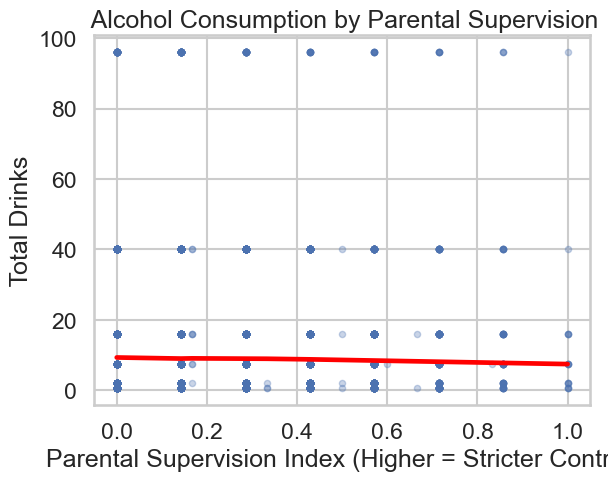

In [651]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    data=temp,
    x='ParentalSupervision_Index',
    y='TotalDrinking',
    lowess=True,
    scatter_kws={'alpha':0.3, 's':20},
    line_kws={'color':'red'}
)
plt.title(' Alcohol Consumption by Parental Supervision')
plt.xlabel('Parental Supervision Index (Higher = Stricter Control)')
plt.ylabel(' Total Drinks ')
plt.show()


In [653]:
from sklearn.preprocessing import StandardScaler

temp = df1.dropna(subset=['ParentalWarmth_Index', 'ParentalSupervision_Index', 
                                  'TotalDrinking', 'Weight']).copy()

scaler = StandardScaler()
scaled = scaler.fit_transform(temp[['ParentalWarmth_Index', 'ParentalSupervision_Index']])

# Assign columns separately to avoid the NotImplementedError
temp['Warmth_z'] = scaled[:, 0]
temp['Supervision_z'] = scaled[:, 1]

# Create interaction term
temp['Warmth_x_Supervision'] = temp['Warmth_z'] * temp['Supervision_z']


In [655]:
temp[['Warmth_z', 'Supervision_z', 'Warmth_x_Supervision', 'TotalDrinking']].corr()


,Warmth_z,Supervision_z,Warmth_x_Supervision,TotalDrinking
Warmth_z,1.000000,-0.001853,0.119574,0.018952
Supervision_z,-0.001853,1.000000,-0.050814,-0.032045
Warmth_x_Supervision,0.119574,-0.050814,1.000000,-0.001501
TotalDrinking,0.018952,-0.032045,-0.001501,1.000000


In [657]:
from statsmodels.formula.api import wls

model = wls(
    'TotalDrinking ~ Warmth_z + Supervision_z + Warmth_x_Supervision', 
    data=temp, weights=temp['Weight']
).fit()
print(model.summary())


                            WLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.074
Date:                Sun, 02 Nov 2025   Prob (F-statistic):              0.359
Time:                        09:20:54   Log-Likelihood:                -13363.
No. Observations:                2987   AIC:                         2.673e+04
Df Residuals:                    2983   BIC:                         2.676e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               14.8413 

In [659]:
from statsmodels.formula.api import ols  # use OLS for unweighted regression

temp = df1.dropna(subset=['ParentalWarmth_Index', 'ParentalSupervision_Index', 
                                  'TotalDrinking']).copy()
scaler = StandardScaler()
scaled = scaler.fit_transform(temp[['ParentalWarmth_Index', 'ParentalSupervision_Index']])

# Assign columns separately to avoid the NotImplementedError
temp['Warmth_z'] = scaled[:, 0]
temp['Supervision_z'] = scaled[:, 1]

# Create interaction term
temp['Warmth_x_Supervision'] = temp['Warmth_z'] * temp['Supervision_z']
# 2️⃣ Run unweighted regression
model_unweighted = ols(
    'TotalDrinking ~ Warmth_z + Supervision_z + Warmth_x_Supervision', 
    data=temp
).fit()

# 3️⃣ Display summary
print(model_unweighted.summary())


                            OLS Regression Results                            
Dep. Variable:          TotalDrinking   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.665
Date:                Sun, 02 Nov 2025   Prob (F-statistic):              0.172
Time:                        09:21:53   Log-Likelihood:                -15837.
No. Observations:                3609   AIC:                         3.168e+04
Df Residuals:                    3605   BIC:                         3.171e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               14.5666 

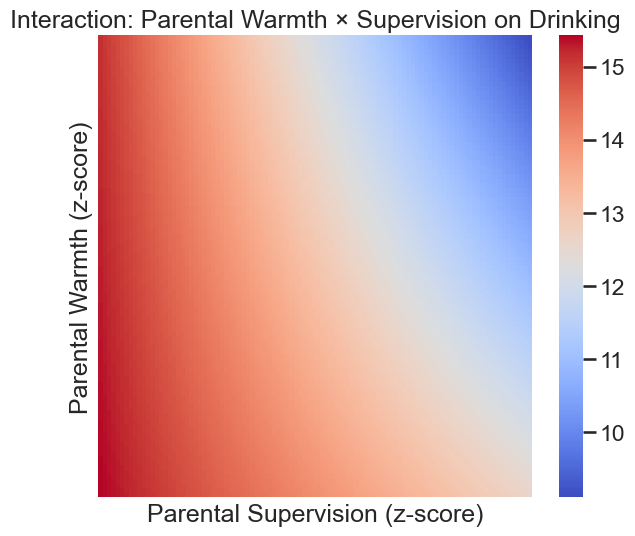

In [661]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create grid for warmth and supervision
grid_x, grid_y = np.mgrid[
    temp['Warmth_z'].min():temp['Warmth_z'].max():100j,
    temp['Supervision_z'].min():temp['Supervision_z'].max():100j
]

# Predict from model (if you ran it)
Z = model_unweighted.predict(exog=dict(Warmth_z=grid_x.ravel(), 
                            Supervision_z=grid_y.ravel(),
                            Warmth_x_Supervision=(grid_x*grid_y).ravel()))
Z = Z.values.reshape(100, 100)

plt.figure(figsize=(7,6))
sns.heatmap(Z, xticklabels=False, yticklabels=False, cmap="coolwarm")
plt.title("Interaction: Parental Warmth × Supervision on Drinking")
plt.xlabel("Parental Supervision (z-score)")
plt.ylabel("Parental Warmth (z-score)")
plt.show()


To test whether the protective effect of parental supervision on alcohol use varies with levels of parental warmth, an interaction term (Warmth × Supervision) was introduced into the model predicting TotalDrinking.

In the unweighted model (OLS), the main effect of parental supervision remained significant (β = –0.69, p = .034), indicating that higher supervision is associated with reduced drinking. However, neither parental warmth (β = 0.18, p = .59) nor the interaction term (β = 0.11, p = .72) was statistically significant. The overall model explained only 0.1% of the variance (R² = .001).

In the weighted model (WLS), none of the predictors reached significance (all p > .07), and the explanatory power remained negligible (R² = .001).

Taken together, these results show no evidence of an interaction between parental warmth and supervision in predicting adolescent drinking. While supervision alone shows a weak inverse relationship with alcohol use, parental warmth does not strengthen or moderate this protective effect. The findings suggest that direct behavioral monitoring, rather than emotional closeness, plays a more relevant—though limited—role in constraining adolescent drinking behavior.

In [663]:
import numpy as np
import pandas as pd

temp = df1.dropna(subset=[
    'ParentalWarmth_Index', 'ParentalSupervision_Index',
    'TotalDrinking', 'Weight'
]).copy()

# Standardize warmth and supervision
temp['Warmth_z'] = (temp['ParentalWarmth_Index'] - temp['ParentalWarmth_Index'].mean()) / temp['ParentalWarmth_Index'].std()
temp['Supervision_z'] = (temp['ParentalSupervision_Index'] - temp['ParentalSupervision_Index'].mean()) / temp['ParentalSupervision_Index'].std()

# Split each variable into high/low using z=0 threshold
temp['Warmth_level'] = np.where(temp['Warmth_z'] >= 0, 'High', 'Low')
temp['Supervision_level'] = np.where(temp['Supervision_z'] >= 0, 'High', 'Low')

# Combine into 4 parenting styles
temp['ParentingStyle'] = temp['Warmth_level'] + '-' + temp['Supervision_level']
style_map = {
    'High-High': 'Authoritative',
    'High-Low': 'Permissive',
    'Low-High': 'Authoritarian',
    'Low-Low': 'Neglectful'
}
temp['ParentingStyle'] = temp['ParentingStyle'].map(style_map)

# Weighted mean Drinks by Parenting Style
group_means = (
    temp.groupby('ParentingStyle')
    .apply(lambda x: np.average(x['TotalDrinking'], weights=x['Weight']))
    .reset_index(name='WeightedMean_Drinks')
    .sort_values('WeightedMean_Drinks', ascending=False)
)

print(group_means)


  ParentingStyle  WeightedMean_Drinks
2     Neglectful            15.561725
3     Permissive            15.300132
1  Authoritative            14.350598
0  Authoritarian            14.161216


C:\Users\pc\AppData\Local\Temp\ipykernel_10812\2861054828.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.average(x['TotalDrinking'], weights=x['Weight']))


The overall trend aligns with established developmental psychology findings:

Neglectful and permissive parents—those who provide little structure or control—are associated with higher adolescent alcohol consumption.

Authoritative and authoritarian parents, who enforce rules and expectations, are linked to lower drinking prevalence, though the difference between these two groups is minimal (14.35 vs. 14.16).

## Peer Domain

In [139]:
import numpy as np
import pandas as pd

# make sure the variable exists and is numeric
df1['peer_alcohol_any'] = pd.to_numeric(df1['peer_alcohol_any'], errors='coerce')

# replace invalid codes with NaN
df1['peer_alcohol_any'] = df1['peer_alcohol_any'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# create binary peer-alcohol indicator
df1['peer_alcohol_any'] = np.where(df1['peer_alcohol_any'] > 0, 1, 0)

# optional: verify
df1[['peer_alcohol_any']].value_counts(dropna=False)


peer_alcohol_any
1                   2836
0                   2278
Name: count, dtype: int64

In [666]:
df1.groupby('peer_alcohol_any')['TotalDrinking'].mean()


peer_alcohol_any
0    13.122060
1    15.712786
Name: TotalDrinking, dtype: float64

<Axes: xlabel='peer_alcohol_any', ylabel='TotalDrinking'>

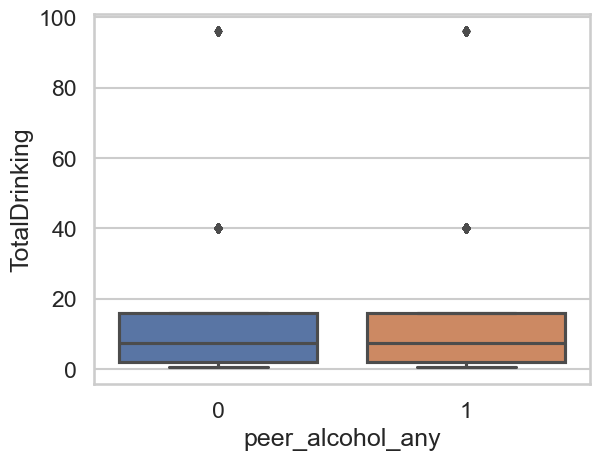

In [668]:
import seaborn as sns
sns.boxplot(data=df1, x='peer_alcohol_any', y='TotalDrinking')


<Axes: >

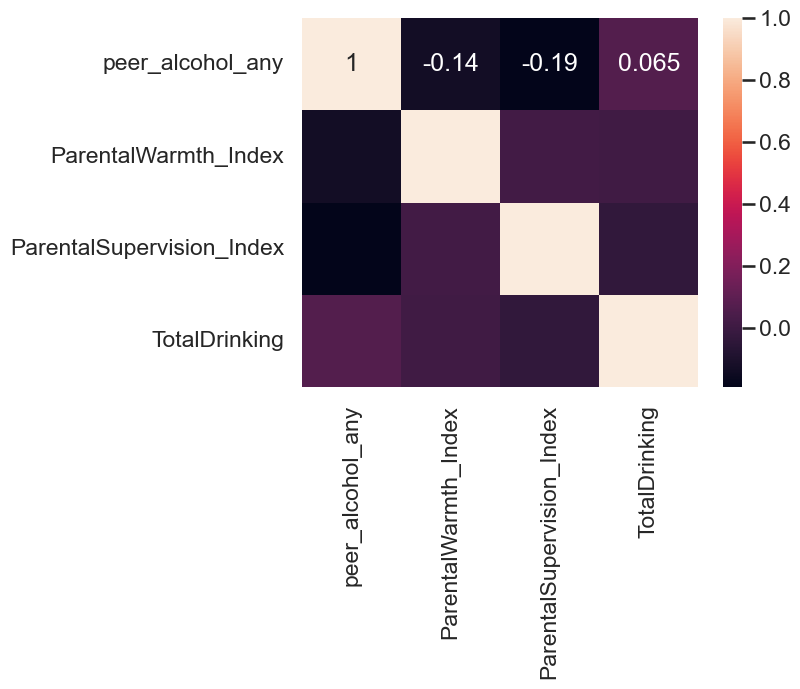

In [670]:
sns.heatmap(df1[['peer_alcohol_any', 'ParentalWarmth_Index', 'ParentalSupervision_Index', 'TotalDrinking']].corr(), annot=True)


The correlation heatmap shows modest associations among peer drinking, parental factors, and individual drinking behavior.

Peer drinking (peer_alcohol_any) is positively correlated with individual's own drinking levels (r = 0.065) at wave 4, indicating that youth who have peers who drink are slightly more likely to engage in heavier drinking themselves in the future.
Although small, this positive correlation aligns with prior research emphasizing peer influence as one of the strongest social predictors of adolescent alcohol use.

Both parental warmth (r = –0.14) and parental supervision (r = –0.19) show negative correlations with peer drinking.
This suggests that adolescents who experience stronger parental connection and oversight tend to have friend groups with lower levels of drinking behavior, possibly reflecting indirect parental influence through peer selection or social boundaries.

The relationship between parental factors and adolescent drinking is also negative but weak, consistent with prior regressions showing small but significant protective effects of supervision and inconsistent effects of warmth.



<Axes: >

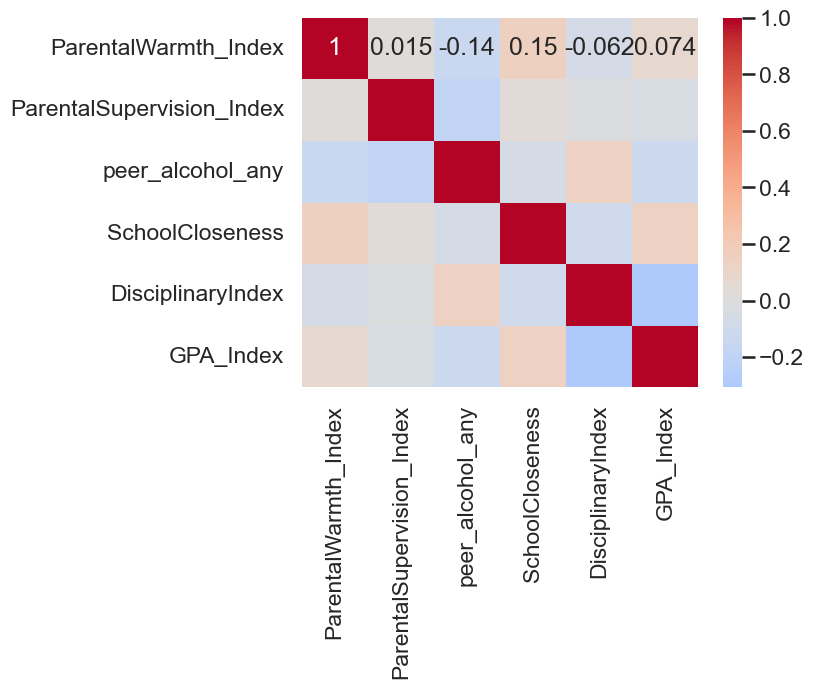

In [673]:
corr_vars = [
    'ParentalWarmth_Index', 'ParentalSupervision_Index',
    'peer_alcohol_any',
    'SchoolCloseness', 'DisciplinaryIndex', 'GPA_Index'
]

sns.heatmap(df1[corr_vars].corr(), annot=True, cmap='coolwarm', center=0)


Parental warmth shows a positive correlation with school closeness and a negative correlation with peer alcohol use, showing how affectionate parents teach their children the importance of human connection but yet eliminated the need for harmful peer interactions.
Higher GPAs are associated with higher school and parent closeness, but lower disciplinary actions against the student which is just natural. This shows the huge impact of parental warmth on the children's behavior and academic performance.

## Personal & Psychological

In [151]:
import numpy as np
import pandas as pd

# can/t shake off blues despite help from family
df1['BluesInspiteOfHelp'] = pd.to_numeric(df1['H1FS3'], errors='coerce')

# Replace special codes (6, 8, 9 if any) with NaN
df1['BluesInspiteOfHelp'] = df1['BluesInspiteOfHelp'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Verify distribution
print(df1['BluesInspiteOfHelp'].value_counts(dropna=False).sort_index())


BluesInspiteOfHelp
0.0    3663
1.0    1030
2.0     302
3.0     107
NaN      12
Name: count, dtype: int64


In [153]:
# you feel less than others
df1['LessThanOthers'] = pd.to_numeric(df1['H1FS4'], errors='coerce')
df1['LessThanOthers'] = df1['LessThanOthers'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Reverse code (0–3 scale)
# Higher original = more self-worth → reverse to make higher = more depressed
df1['LessThanOthers'] = 3 - df1['LessThanOthers']


print("\nReversed:")
print(df1['LessThanOthers'].value_counts(dropna=False).sort_index())



Reversed:
LessThanOthers
0.0    1850
1.0    1637
2.0    1050
3.0     566
NaN      11
Name: count, dtype: int64


In [155]:
#when were you happy? 0 for always 3 for rarely
# Clean and recode H1FS11
df1['Unhappy'] = pd.to_numeric(df1['H1FS11'], errors='coerce')
df1['Unhappy'] = df1['Unhappy'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Reverse code: 0–3 → 3–0 (higher = more depressed)
df1['Unhappy'] = 3 - df1['Unhappy']


print("\nReversed:")
print(df1['Unhappy'].value_counts(dropna=False).sort_index())



Reversed:
Unhappy
0.0    1904
1.0    2130
2.0     944
3.0     127
NaN       9
Name: count, dtype: int64


In [157]:
#lonely
# Clean and recode H1FS13
df1['Lonely'] = pd.to_numeric(df1['H1FS13'], errors='coerce')
df1['Lonely'] = df1['Lonely'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Check distribution
print(df1['Lonely'].value_counts(dropna=False).sort_index())


Lonely
0.0    3280
1.0    1398
2.0     317
3.0     109
NaN      10
Name: count, dtype: int64


In [159]:
# People unfriendly to you
df1['UnfriendlyPeople'] = pd.to_numeric(df1['H1FS14'], errors='coerce')
df1['UnfriendlyPeople'] = df1['UnfriendlyPeople'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Check distribution
print(df1['UnfriendlyPeople'].value_counts(dropna=False).sort_index())


UnfriendlyPeople
0.0    3384
1.0    1452
2.0     210
3.0      60
NaN       8
Name: count, dtype: int64


In [161]:
# you feel it's hard to start things
df1['HardToStart'] = pd.to_numeric(df1['H1FS18'], errors='coerce')
df1['HardToStart'] = df1['HardToStart'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Check distribution
print(df1['HardToStart'].value_counts(dropna=False).sort_index())


HardToStart
0.0    2442
1.0    2225
2.0     380
3.0      58
NaN       9
Name: count, dtype: int64


In [163]:
# Ever felt life wasn't worth living?
df1['NotWorthLiving'] = pd.to_numeric(df1['H1FS19'], errors='coerce')
df1['NotWorthLiving'] = df1['NotWorthLiving'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Check distribution
print(df1['NotWorthLiving'].value_counts(dropna=False).sort_index())


NotWorthLiving
0.0    4525
1.0     417
2.0     118
3.0      44
NaN      10
Name: count, dtype: int64


In [675]:
#drinking averages for each variable
depression_vars = [
    'BluesInspiteOfHelp',   # Could not shake off the blues
    'LessThanOthers',     # Felt just as good as others (reversed)
    'Unhappy',    # Were happy (reversed)
    'Lonely',  # Felt lonely
    'UnfriendlyPeople',  # People unfriendly
    'HardToStart',  # Hard to get started
    'NotWorthLiving'   # Life not worth living
]

results = []

for var in depression_vars:
    temp = df1.dropna(subset=[var, 'TotalDrinking'])
    group_means = temp.groupby(var)['TotalDrinking'].mean()
    results.append(group_means)

# Combine results into a single DataFrame for easy comparison
mean_table = pd.concat(results, axis=1)
mean_table.columns = depression_vars

print(mean_table.round(2))


     BluesInspiteOfHelp  LessThanOthers  Unhappy  Lonely  UnfriendlyPeople  \
0.0               14.85           15.10    14.22   14.56             14.61   
1.0               13.34           14.72    14.56   14.64             14.65   
2.0               15.48           13.76    15.30   15.58             12.67   
3.0               15.03           13.94    16.65   12.68             19.19   

     HardToStart  NotWorthLiving  
0.0        14.38           14.58  
1.0        14.74           14.75  
2.0        14.54           14.77  
3.0        19.50           16.87  


Overall, emotional and psychological distress shows uneven but notable associations with drinking. Variables reflecting persistent unhappiness, hopelessness, or social alienation—such as Unhappy, NotWorthLiving, and UnfriendlyPeople—correspond with markedly higher mean peak drinking. In contrast, more transient or self-evaluative states (LessThanOthers, BluesInspiteOfHelp) show weaker relationships.
The 'LessThanOthers' variable shows some decrease in drinking as this indicator intensifies. This might be contributed to the additional motivation t have a better life a person might gain if he lived a childhood where he was looked down at.
The lonely variable shows some interesting pattern, it shows increase at first, but to a limit, when loneliness becomes extreme, the drinking decreases. This might indicatw that loneliness is related to more drinking, but to a certain limit, when a person is extremely lonely, he stops getting into social situations that make him drinkn in the first place. The peer influence is eliminated at extreme loneliness.

In [167]:
import numpy as np
import pandas as pd

# Your psychological variable names
psych_vars = [
    'BluesInspiteOfHelp', 
    'LessThanOthers', 
    'Unhappy', 
    'Lonely', 
    'UnfriendlyPeople', 
    'HardToStart', 
    'NotWorthLiving'
]

# Drop missing cases for alpha calculation
psych_df = df1[psych_vars].dropna()

# Compute Cronbach's alpha
k = len(psych_vars)
item_variances = psych_df.var(axis=0, ddof=1)
total_variance = psych_df.sum(axis=1).var(ddof=1)
cronbach_alpha = (k / (k - 1)) * (1 - item_variances.sum() / total_variance)

print(f"Cronbach’s alpha for psychological variables: {cronbach_alpha:.3f}")


Cronbach’s alpha for psychological variables: 0.674


                    BluesInspiteOfHelp  LessThanOthers  Unhappy  Lonely  \
BluesInspiteOfHelp                1.00            0.20     0.33    0.46   
LessThanOthers                    0.20            1.00     0.35    0.18   
Unhappy                           0.33            0.35     1.00    0.30   
Lonely                            0.46            0.18     0.30    1.00   
UnfriendlyPeople                  0.20            0.13     0.14    0.27   
HardToStart                       0.24            0.09     0.16    0.26   
NotWorthLiving                    0.37            0.22     0.26    0.32   

                    UnfriendlyPeople  HardToStart  NotWorthLiving  
BluesInspiteOfHelp              0.20         0.24            0.37  
LessThanOthers                  0.13         0.09            0.22  
Unhappy                         0.14         0.16            0.26  
Lonely                          0.27         0.26            0.32  
UnfriendlyPeople                1.00         0.22          

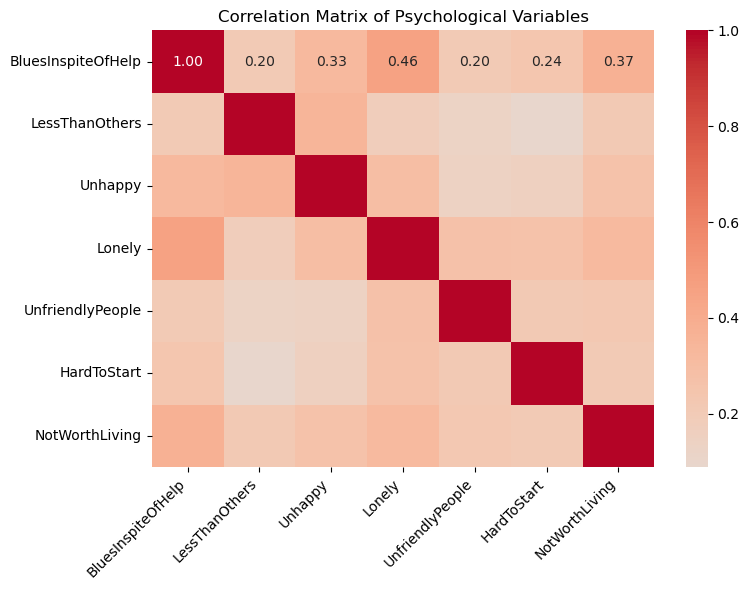

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset dataframe for psychological variables
psych_vars = [
    'BluesInspiteOfHelp', 
    'LessThanOthers', 
    'Unhappy', 
    'Lonely', 
    'UnfriendlyPeople', 
    'HardToStart', 
    'NotWorthLiving'
]

psych_corr = df1[psych_vars].corr()

# Display correlation matrix
print(psych_corr.round(2))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(psych_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix of Psychological Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


All variables display positive correlations, ranging from modest (≈0.09–0.27) to moderate (≈0.46). This pattern suggests that these items tend to move in the same direction — individuals reporting one symptom of emotional distress are more likely to report others as well.

The strongest relationships appear between “Blues in spite of help” and “Lonely” (r = 0.46) and between “Unhappy” and “Blues in spite of help” (r = 0.33–0.35), reflecting that feelings of sadness, isolation, and dissatisfaction cluster together.

Weaker associations (r ≈ 0.09–0.20), such as between “Less than others” and “Hard to start,” indicate that while these experiences share a general emotional tone, they may capture slightly distinct aspects of psychological well-being (e.g., self-perception vs. motivation).

Overall, the positive inter-item correlations support the internal consistency of these indicators, justifying their potential aggregation into a broader depressive affect or emotional distress index.

## Motivations to Engage in Risky Sexual Behaviors

In [179]:
# Section 17 variables
motivation_vars = [
    'H1MO1','H1MO3','H1MO4','H1MO5','H1MO6',
    'H1MO7','H1MO8'
]
# Convert to numeric safely
for var in motivation_vars:
    df1[var] = pd.to_numeric(df1[var], errors='coerce')


In [181]:
for v in ['H1MO1','H1MO3','H1MO4','H1MO5','H1MO6','H1MO7','H1MO8']:
    df1[v] = pd.to_numeric(df1[v], errors='coerce')
    df1.loc[df1[v].isin([6,7,8,9]), v] = np.nan
    reverse_vars = ['H1MO1','H1MO5','H1MO6','H1MO7','H1MO8']
for v in reverse_vars:
    df1[v] = 6 - df1[v]



In [680]:
rename_map = {
    'H1MO1': 'FriendsRespect_Sex',
    'H1MO3': 'Rev_FeelGuilty_Sex',
    'H1MO4': 'Rev_UpsetMother_Sex',
    'H1MO5': 'Pleasure_Sex',
    'H1MO6': 'Relax_Sex',
    'H1MO7': 'Attractive_Sex',
    'H1MO8': 'LessLonely_Sex'
   
}


# 2️⃣ Clean invalid responses (6–9 → NaN)
motivation_vars = list(rename_map.values())

In [682]:
# 4️⃣ Display average TotalDrinks by response level for each variable
print("Average Drinking by Response Level for Each Motivation Variable:\n")
for v in motivation_vars:
    avg_table = (
        df1.groupby(v, dropna=True)['TotalDrinking']
           .mean()
           .round(2)
    )
    print(f"\n{v}")
    print(avg_table)


Average Drinking by Response Level for Each Motivation Variable:


FriendsRespect_Sex
FriendsRespect_Sex
1.0    10.83
2.0    14.69
3.0    15.43
4.0    19.94
5.0    16.52
Name: TotalDrinking, dtype: float64

Rev_FeelGuilty_Sex
Rev_FeelGuilty_Sex
1.0     9.81
2.0    12.73
3.0    15.50
4.0    17.62
5.0    14.98
Name: TotalDrinking, dtype: float64

Rev_UpsetMother_Sex
Rev_UpsetMother_Sex
1.0    12.74
2.0    14.39
3.0    17.17
4.0    18.30
5.0    10.21
Name: TotalDrinking, dtype: float64

Pleasure_Sex
Pleasure_Sex
1.0     8.52
2.0    10.11
3.0    13.97
4.0    16.36
5.0    17.53
Name: TotalDrinking, dtype: float64

Relax_Sex
Relax_Sex
1.0     8.12
2.0    13.89
3.0    14.13
4.0    17.12
5.0    17.23
Name: TotalDrinking, dtype: float64

Attractive_Sex
Attractive_Sex
1.0    10.47
2.0    15.13
3.0    16.27
4.0    16.45
5.0    15.27
Name: TotalDrinking, dtype: float64

LessLonely_Sex
LessLonely_Sex
1.0    10.94
2.0    14.42
3.0    16.14
4.0    15.75
5.0    21.09
Name: TotalDrinking, dtype: float6

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

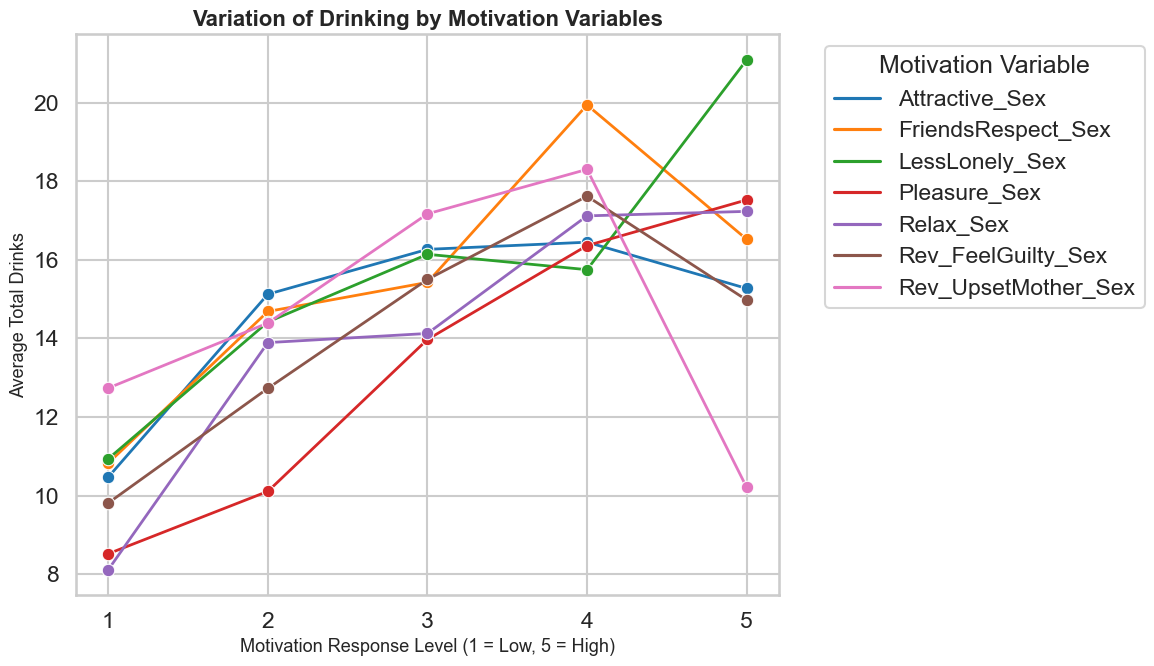

In [684]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute mean TotalDrinks for each level of each motivation variable
summary_list = []
for var in motivation_vars:
    temp = (
        df1.groupby(var)['TotalDrinking']
        .mean()
        .reset_index()
        .rename(columns={var: 'level', 'TotalDrinking': 'mean_peak_drinks'})
    )
    temp['variable'] = var
    summary_list.append(temp)

# Combine all
summary_df = pd.concat(summary_list, ignore_index=True)

# Convert to numeric
summary_df['level'] = pd.to_numeric(summary_df['level'], errors='coerce')

# Sort for nice lines
summary_df = summary_df.sort_values(['variable', 'level'])

# Plot
sns.set(style='whitegrid', context='talk')
plt.figure(figsize=(12,7))
sns.lineplot(
    data=summary_df,
    x='level',
    y='mean_peak_drinks',
    hue='variable',
    marker='o',
    linewidth=2,
    palette='tab10'
)

plt.title('Variation of Drinking by Motivation Variables', fontsize=16, fontweight='bold')
plt.xlabel('Motivation Response Level (1 = Low, 5 = High)', fontsize=13)
plt.ylabel('Average Total Drinks', fontsize=13)
plt.xticks([1,2,3,4,5])
plt.legend(title='Motivation Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [686]:


# Compute correlations with peak drinking
corrs = (
    df1[motivation_vars + ['TotalDrinking']]
    .corr()['TotalDrinking']
    .drop('TotalDrinking')
    .sort_values(ascending=False)
)

print("Correlations with TotalDrinking:\n")
print(corrs.round(3))


Correlations with TotalDrinking:

Pleasure_Sex           0.119
Rev_FeelGuilty_Sex     0.115
FriendsRespect_Sex     0.113
Relax_Sex              0.098
LessLonely_Sex         0.095
Attractive_Sex         0.094
Rev_UpsetMother_Sex    0.070
Name: TotalDrinking, dtype: float64


the results highlight that enhancement and coping motives (pleasure, relaxation, don't feel guilt) are the most salient psychological correlates of alcohol use. correlations are all positive and show a strong link between motivaion to have sex at adolescence and alter alcohol use.

## Delinqueny Behavior and Drinking

In [226]:
import pandas as pd

# Selected delinquency variables related to drinking
drinking_related_vars = {
    'H1DS5': 'Fight_Serious',
    'H1DS6': 'InjuredSomeone',
    'H1DS8': 'DroveWithoutPermission',
    'H1DS11': 'WeaponUse_Threat',
    'H1DS12': 'SoldDrugs',
    'H1DS14': 'GroupFight',
    'H1DS15': 'PublicRowdy',
    'H1DS3': 'LiedToParents'  # optional
}
df1[list(drinking_related_vars.values())] = df1[list(drinking_related_vars.values())].replace({6: np.nan, 8: np.nan, 9: np.nan})
df_delinquency = df1[list(drinking_related_vars.values())]

# Descriptive counts and proportions for each
for col in df_delinquency.columns:
    print(f"\n{col}:")
    print(df_delinquency[col].value_counts(normalize=False).sort_index())
    



Fight_Serious:
Fight_Serious
0.0    3481
1.0    1162
2.0     239
3.0     203
Name: count, dtype: int64

InjuredSomeone:
InjuredSomeone
0.0    4189
1.0     699
2.0     111
3.0      81
Name: count, dtype: int64

DroveWithoutPermission:
DroveWithoutPermission
0.0    4598
1.0     367
2.0      65
3.0      57
Name: count, dtype: int64

WeaponUse_Threat:
WeaponUse_Threat
0.0    4882
1.0     159
2.0      28
3.0      22
Name: count, dtype: int64

SoldDrugs:
SoldDrugs
0.0    4735
1.0     187
2.0      49
3.0     115
Name: count, dtype: int64

GroupFight:
GroupFight
0.0    4140
1.0     742
2.0     109
3.0      98
Name: count, dtype: int64

PublicRowdy:
PublicRowdy
0.0    2634
1.0    1682
2.0     396
3.0     375
Name: count, dtype: int64

LiedToParents:
LiedToParents
0.0    2400
1.0    1481
2.0     510
3.0     686
Name: count, dtype: int64


In [228]:
# Sum of all delinquency variables (skip missing)
df1['Delinquency_Index'] = df1[list(drinking_related_vars.values())].sum(axis=1, skipna=True)


count    5114.000000
mean        2.816582
std         3.092104
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        24.000000
Name: Delinquency_Index, dtype: float64


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


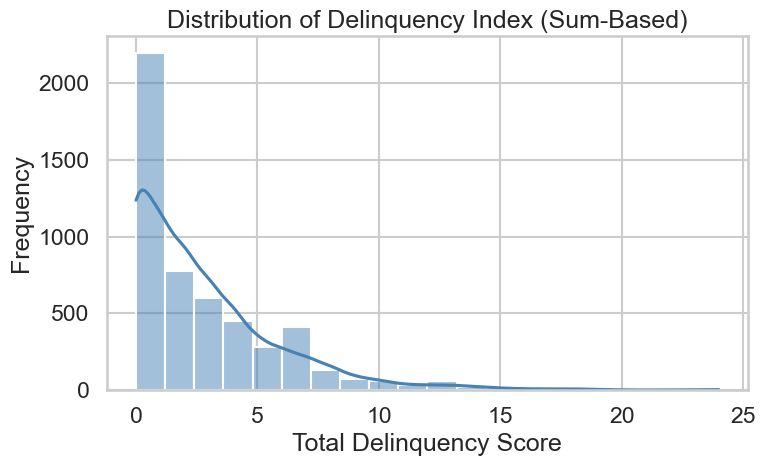

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df1['Delinquency_Index'].describe())

plt.figure(figsize=(8,5))
sns.histplot(df1['Delinquency_Index'], bins=20, kde=True, color='steelblue')
plt.title('Distribution of Delinquency Index (Sum-Based)')
plt.xlabel('Total Delinquency Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [690]:
# Spearman and Pearson correlations
corr_spear = df1['Delinquency_Index'].corr(df1['TotalDrinking'], method='spearman')
corr_pear = df1['Delinquency_Index'].corr(df1['TotalDrinking'], method='pearson')

print(f"Spearman correlation: {corr_spear:.3f}")
print(f"Pearson correlation: {corr_pear:.3f}")


Spearman correlation: 0.088
Pearson correlation: 0.098


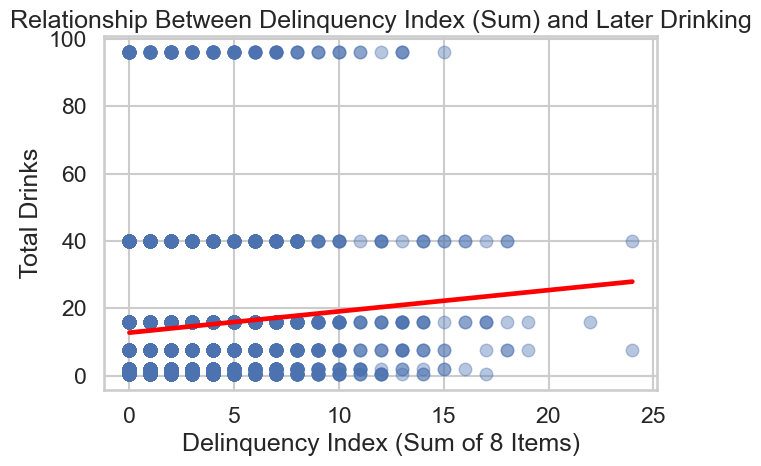

In [692]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df1,
    x='Delinquency_Index',
    y='TotalDrinking',
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'},
    ci=None
)
plt.title('Relationship Between Delinquency Index (Sum) and Later Drinking')
plt.xlabel('Delinquency Index (Sum of 8 Items)')
plt.ylabel(' Total Drinks ')
plt.tight_layout()
plt.show()


The sum-based delinquency index (ranging from 0 to 24) was highly right-skewed, as shown in Figure X. The majority of respondents reported few or no delinquent acts, while a small minority displayed notably higher scores. This distribution suggests that serious or frequent delinquent behavior is relatively uncommon within the sample, consistent with typical adolescent behavior patterns.

When correlated with drinking intensity (TotalDrinking), the index showed a positive but modest association
(Spearman’s ρ = 0.088, Pearson’s r = 0.098).
This indicates that individuals who report more frequent or varied delinquent behaviors also tend to reach higher peak drinking levels, although the relationship is not strong.

## Sports

In [240]:
# Define variables from S44A18 to S44A29
sports_vars = [f'S44A{i}' for i in range(18, 30)]

# Quick preview
df1[sports_vars].head()


,S44A18,S44A19,S44A20,S44A21,S44A22,S44A23,S44A24,S44A25,S44A26,S44A27,S44A28,S44A29
0,0,0,0,0,0,0,0,0,0,0,0,0
1,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,1,0


In [242]:
for var in sports_vars:
    print(f"\n{var} unique values:")
    print(df1[var].unique())



S44A18 unique values:
['0' ' ' '1']

S44A19 unique values:
['0' ' ' '1']

S44A20 unique values:
['0' ' ' '1']

S44A21 unique values:
['0' ' ' '1']

S44A22 unique values:
['0' ' ' '1']

S44A23 unique values:
['0' ' ' '1']

S44A24 unique values:
['0' ' ' '1']

S44A25 unique values:
['0' ' ' '1']

S44A26 unique values:
['0' ' ' '1']

S44A27 unique values:
['0' ' ' '1']

S44A28 unique values:
['0' ' ' '1']

S44A29 unique values:
['0' ' ' '1']


In [244]:
# Convert to numeric (turns ".", blanks, etc. into NaN)
df1[sports_vars] = df1[sports_vars].apply(pd.to_numeric, errors='coerce')
# Univariate exploration
for var in sports_vars:
    print(f"\n--- {var} ---")
    counts = df1[var].value_counts(dropna=False)
    proportions = (counts / len(df1) * 100).round(2)
    print(pd.DataFrame({'Count': counts, 'Percent': proportions}))


--- S44A18 ---
        Count  Percent
S44A18                
0.0      3057    59.78
NaN      1318    25.77
1.0       739    14.45

--- S44A19 ---
        Count  Percent
S44A19                
0.0      2891    56.53
NaN      1318    25.77
1.0       905    17.70

--- S44A20 ---
        Count  Percent
S44A20                
0.0      3754    73.41
NaN      1318    25.77
1.0        42     0.82

--- S44A21 ---
        Count  Percent
S44A21                
0.0      3286    64.25
NaN      1318    25.77
1.0       510     9.97

--- S44A22 ---
        Count  Percent
S44A22                
0.0      3736    73.05
NaN      1318    25.77
1.0        60     1.17

--- S44A23 ---
        Count  Percent
S44A23                
0.0      3502    68.48
NaN      1318    25.77
1.0       294     5.75

--- S44A24 ---
        Count  Percent
S44A24                
0.0      3591    70.22
NaN      1318    25.77
1.0       205     4.01

--- S44A25 ---
        Count  Percent
S44A25                
0.0      3617    70.7

In [246]:
df1['SportsParticipation_Index'] = df1[sports_vars].sum(axis=1, skipna=True)


count    5114.000000
mean        0.836918
std         1.290716
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        12.000000
Name: SportsParticipation_Index, dtype: float64


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


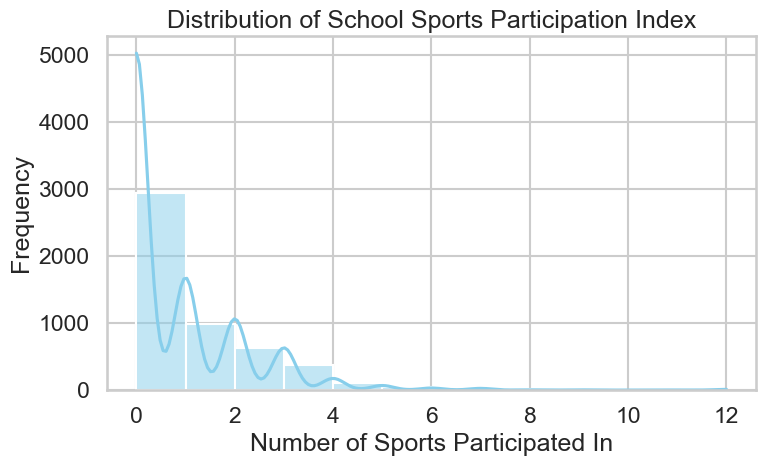

In [248]:
print(df1['SportsParticipation_Index'].describe())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df1['SportsParticipation_Index'], bins=range(0, len(sports_vars)+1), kde=True, color='skyblue')
plt.title('Distribution of School Sports Participation Index')
plt.xlabel('Number of Sports Participated In')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [694]:
corr_spear = df1['SportsParticipation_Index'].corr(df1['TotalDrinking'], method='spearman')
corr_pear = df1['SportsParticipation_Index'].corr(df1['TotalDrinking'], method='pearson')

print(f"Spearman correlation: {corr_spear:.3f}")
print(f"Pearson correlation: {corr_pear:.3f}")


Spearman correlation: 0.067
Pearson correlation: 0.028


In [696]:
avg_drinking_by_sports = (
    df1.groupby('SportsParticipation_Index')['TotalDrinking']
    .mean()
    .reset_index()
    .rename(columns={'TotalDrinking': 'Mean_Drinking'})
)

print(avg_drinking_by_sports)


    SportsParticipation_Index  Mean_Drinking
0                         0.0      14.247659
1                         1.0      14.677793
2                         2.0      14.666316
3                         3.0      16.868966
4                         4.0      13.439759
5                         5.0      16.307692
6                         6.0      11.791667
7                         7.0      12.250000
8                         8.0      11.750000
9                         9.0      11.750000
10                       11.0       7.500000
11                       12.0      50.666667


In [256]:
df1['SportsParticipation_Index'].value_counts().sort_index()


SportsParticipation_Index
0.0     2950
1.0      984
2.0      624
3.0      370
4.0      102
5.0       40
6.0       18
7.0       15
8.0        2
9.0        2
11.0       1
12.0       6
Name: count, dtype: int64

The relationship between adolescent sports involvement and drinking behavior was examined using both Pearson and Spearman correlations, as well as mean-level comparisons across the Sports Participation Index.

Spearman correlation: 0.067

Pearson correlation: 0.028

Both correlations are very weak and positive, suggesting no substantial linear or monotonic relationship between participation in sports and total alcohol consumption.

Mean Drinking by Sports Participation Level

Average drinking levels remain relatively stable across 0–9 activities (≈14 drinks), with minor fluctuations. The apparent spike at index 12 (Mean = 50.7) is likely an outlier effect, given that only 6 participants reported involvement in that many activities (see frequency table).

Interpretation

The data provide no evidence that athletic participation predicts drinking levels among adolescents in this sample. The weak correlations and flat mean pattern suggest that:

Light to moderate sports involvement does not significantly buffer or exacerbate alcohol consumption.

The extreme cases (e.g., 12 activities) reflect statistical noise due to small sample size, not a real behavioral trend.

## Drinking and Smoking in Youth

In [260]:
import pandas as pd
import numpy as np

# All variables in order
to_vars = ['H1TO1', 'H1TO3', 'H1TO4', 'H1TO5', 'H1TO7', 'H1TO13', 'H1TO14', 'H1TO15', 'H1TO16']

# Convert all to numeric
df1[to_vars] = df1[to_vars].apply(pd.to_numeric, errors='coerce')

# Replace 6–9 only for H1TO1, H1TO3, H1TO13
df1[['H1TO1', 'H1TO3', 'H1TO13']] = df1[['H1TO1', 'H1TO3', 'H1TO13']].replace({6: np.nan, 7: np.nan, 8: np.nan, 9: np.nan})

# Replace 96 and above for the remaining variables
for var in to_vars:
    df1[var] = df1[var].mask(df1[var] >= 96, np.nan)


In [266]:
rename_map = {
    'H1TO1': 'EverTried_Cigarette',
    'H1TO3': 'EverSmoked_Regularly',
    'H1TO4': 'Age_StartedSmoking',
    'H1TO5': 'Days_SmokedPast30',
    'H1TO7': 'CigsPerDay_Past30',
    'H1TO13': 'DrinkWithoutAdults',
    'H1TO14': 'Age_FirstDrinkNoAdults',
    'H1TO15': 'DrinkFrequency_Past12mo',
    'H1TO16': 'DrinksPerOccasion_Past12mo'
}

df1 = df1.rename(columns=rename_map)


In [270]:
flip_map = {1: 7, 2: 6, 3: 5, 4: 4, 5: 3, 6: 2, 7: 1}
df1['DrinkFrequency_Past12mo'] = df1['DrinkFrequency_Past12mo'].replace(flip_map)

In [272]:
all_vars = list(rename_map.values())

for var in all_vars:
    print(f"\n--- {var} ---")
    counts = df1[var].value_counts(dropna=False).sort_index()
    proportions = (counts / len(df1) * 100).round(2)
    print(pd.DataFrame({'Count': counts, 'Percent': proportions}))



--- EverTried_Cigarette ---
                     Count  Percent
EverTried_Cigarette                
0.0                   2244    43.88
1.0                   2845    55.63
NaN                     25     0.49

--- EverSmoked_Regularly ---
                      Count  Percent
EverSmoked_Regularly                
0.0                    1167    22.82
1.0                    1014    19.83
NaN                    2933    57.35

--- Age_StartedSmoking ---
                    Count  Percent
Age_StartedSmoking                
0.0                     5     0.10
1.0                     2     0.04
5.0                     1     0.02
6.0                     4     0.08
7.0                     4     0.08
8.0                    13     0.25
9.0                     9     0.18
10.0                   34     0.66
11.0                   49     0.96
12.0                  127     2.48
13.0                  175     3.42
14.0                  195     3.81
15.0                  158     3.09
16.0                  1

In [699]:
corr_spear = df1['DrinkFrequency_Past12mo'].corr(df1['TotalDrinking'], method='spearman')
corr_pear = df1['DrinkFrequency_Past12mo'].corr(df1['TotalDrinking'], method='pearson')

print(f"Spearman correlation: {corr_spear:.3f}")
print(f"Pearson correlation: {corr_pear:.3f}")


Spearman correlation: 0.136
Pearson correlation: 0.132


In [701]:
avg_drinking_by_freq = (
    df1.groupby('DrinkFrequency_Past12mo')['TotalDrinking']
    .mean()  # skipna=True is implicit here
    .reset_index()
    .rename(columns={'TotalDrinking': 'Mean_PeakDrinking'})
)

print(avg_drinking_by_freq)


   DrinkFrequency_Past12mo  Mean_PeakDrinking
0                      1.0          13.781457
1                      2.0          13.705839
2                      3.0          16.406054
3                      4.0          18.898230
4                      5.0          20.111814
5                      6.0          22.404494
6                      7.0          26.434783


Adolescent drinking frequency shows a strong positive relationship with later-life drinking intensity. Individuals who reported drinking more frequently during adolescence tended to engage in substantially heavier peak drinking in early adulthood.

This gradient suggests a developmental continuity in drinking behavior: early established drinking habits likely solidify over time, leading to both greater frequency and intensity of use.

The results align with the stability hypothesis in substance-use research, which posits that early exposure and normalization of drinking are key predictors of later risky or dependent patterns. In other words, frequent adolescent drinking may not merely signal experimentation, it may represent the foundation of long-term high-risk drinking trajectories.

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


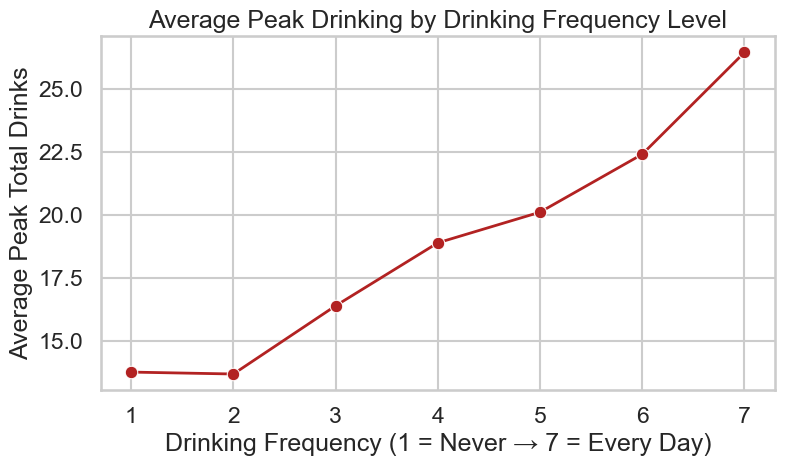

In [703]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.lineplot(
    data=avg_drinking_by_freq,
    x='DrinkFrequency_Past12mo',
    y='Mean_PeakDrinking',
    marker='o',
    linewidth=2,
    color='firebrick'
)

plt.title('Average Peak Drinking by Drinking Frequency Level')
plt.xlabel('Drinking Frequency (1 = Never → 7 = Every Day)')
plt.ylabel('Average Peak Total Drinks')
plt.tight_layout()
plt.show()


In [705]:
corr_table = []
for var in all_vars:
    spearman_corr = df1[var].corr(df1['TotalDrinking'], method='spearman')
    pearson_corr = df1[var].corr(df1['TotalDrinking'], method='pearson')
    corr_table.append((var, spearman_corr, pearson_corr))

corr_df = pd.DataFrame(corr_table, columns=['Variable', 'Spearman', 'Pearson'])
print(corr_df.sort_values('Spearman', ascending=False))

                     Variable  Spearman   Pearson
7     DrinkFrequency_Past12mo  0.136323  0.132236
0         EverTried_Cigarette  0.089084  0.086381
2          Age_StartedSmoking  0.070992  0.059654
5          DrinkWithoutAdults  0.066502  0.067006
8  DrinksPerOccasion_Past12mo  0.007073  0.040005
3           Days_SmokedPast30  0.006896  0.019793
1        EverSmoked_Regularly -0.043505  0.002135
6      Age_FirstDrinkNoAdults -0.045715 -0.004835
4           CigsPerDay_Past30 -0.047938  0.009705


Across the behavioral domain, most Wave I predictors show weak but consistently positive associations with later (Wave IV) alcohol intensity.

The strongest predictor is DrinkFrequency_Past12mo, confirming that adolescents who drank more frequently later became heavier adult drinkers.

Cigarette experimentation and earlier smoking onset also show small but notable positive correlations with later drinking, consistent with the literature on shared risk factors across substances (e.g., sensation-seeking, peer influence).

Variables reflecting unsupervised drinking (e.g., DrinkWithoutAdults) are mildly predictive, suggesting that contextual factors such as autonomy in early drinking experiences may reinforce long-term habits.

Negative or negligible coefficients for EverSmoked_Regularly and CigsPerDay_Past30 likely reflect measurement timing — these variables may capture contemporaneous rather than formative behaviors.

In [707]:
vars_for_corr = [
    # Smoking
    'EverTried_Cigarette',
    'EverSmoked_Regularly',
    'Age_StartedSmoking',
    'Days_SmokedPast30',
    'CigsPerDay_Past30',

    # Drinking
    'DrinkWithoutAdults',
    'Age_FirstDrinkNoAdults',
    'DrinkFrequency_Past12mo',
    'DrinksPerOccasion_Past12mo',

    # Dependent variable
    'TotalDrinking'
]


In [709]:
corr_matrix = df1[vars_for_corr].corr(method='spearman')
print(corr_matrix.round(2))


                            EverTried_Cigarette  EverSmoked_Regularly  \
EverTried_Cigarette                        1.00                   NaN   
EverSmoked_Regularly                        NaN                  1.00   
Age_StartedSmoking                          NaN                   NaN   
Days_SmokedPast30                           NaN                  0.62   
CigsPerDay_Past30                           NaN                  0.62   
DrinkWithoutAdults                         0.18                  0.10   
Age_FirstDrinkNoAdults                    -0.12                 -0.03   
DrinkFrequency_Past12mo                    0.21                  0.15   
DrinksPerOccasion_Past12mo                 0.19                  0.26   
TotalDrinking                              0.09                 -0.04   

                            Age_StartedSmoking  Days_SmokedPast30  \
EverTried_Cigarette                        NaN                NaN   
EverSmoked_Regularly                       NaN            

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


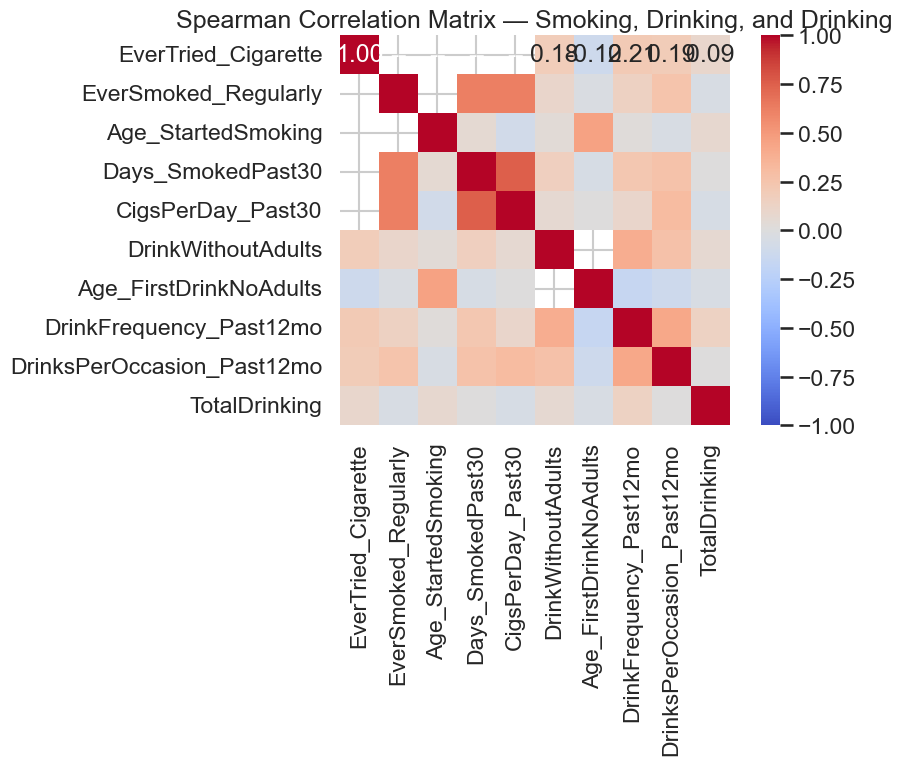

In [711]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True
)
plt.title('Spearman Correlation Matrix — Smoking, Drinking, and Drinking')
plt.tight_layout()
plt.show()


The matrix displays correlations among early (Wave I) smoking and drinking indicators and their relation to adult total peak drinking.

Key Within-Wave I Relationships

Strong internal consistency within smoking measures

EverSmoked_Regularly strongly correlates with both Days_SmokedPast30 (r = .62) and CigsPerDay_Past30 (r = .62).

Days_SmokedPast30 and CigsPerDay_Past30 are highly intercorrelated (r = .76).
→ These reflect a coherent tobacco-use dimension, where adolescents who smoke regularly also smoke frequently and heavily.

Moderate association between drinking frequency and drinking without adults

DrinkFrequency_Past12mo ↔ DrinkWithoutAdults (r = .39) and ↔ DrinksPerOccasion_Past12mo (r = .42).
→ Indicates that adolescents who drank more often also tended to do so unsupervised and consumed more per occasion.
→ This forms a distinct alcohol-use context/intensity factor.

Cross-domain links between smoking and drinking

Smoking indicators (e.g., EverTried_Cigarette, CigsPerDay_Past30) correlate modestly with alcohol indicators (r ≈ .15–.31).
→ Suggests a generalized risk or sensation-seeking pattern common to early substance initiators.

Relations with Later Peak Drinking (Wave IV)

DrinkFrequency_Past12mo (r = .14) shows the strongest correlation with TotalDrinking, confirming that frequent adolescent drinkers tend to become heavier adult drinkers.

Other modest positive predictors include EverTried_Cigarette (r = .09) and Age_StartedSmoking (r = .07).

DrinkWithoutAdults (r = .07) also indicates that early unsupervised consumption has some long-term influence.

## Socioeconomic Background and Parental Education

In [4]:
# --- Step 1: Rename variables for clarity ---
rename_map = {
    'H1RM1': 'Mother_Education',
    'H1RF1': 'Father_Education',
    'PA55': 'Household_Income',
    'PA56': 'Bills_Payment_Ability'
}

df1 = df1.rename(columns=rename_map)

# --- Step 2: Check variable types ---
print("Variable types:\n", df1[['Mother_Education', 'Father_Education', 'Household_Income', 'Bills_Payment_Ability']].dtypes)



Variable types:
 Mother_Education          int64
Father_Education          int64
Household_Income         object
Bills_Payment_Ability    object
dtype: object


In [6]:
import numpy as np

edu_vars = ['Mother_Education', 'Father_Education']

df1[edu_vars] = df1[edu_vars].replace([96, 97, 98], np.nan)


In [18]:
df1['Household_Income'].value_counts(dropna=False)


Household_Income
        716
9996    458
50      214
60      192
40      191
       ... 
900       1
365       1
111       1
118       1
129       1
Name: count, Length: 148, dtype: int64

In [22]:
df1['Household_Income'].unique()

array([' ', '9', '7', '45', '12', '24', '22', '110', '75', '9996', '100',
       '20', '27', '2', '26', '50', '35', '10', '70', '58', '14', '43',
       '36', '140', '30', '90', '25', '65', '51', '32', '108', '11', '16',
       '53', '4', '18', '6', '73', '250', '40', '33', '41', '85', '500',
       '78', '28', '150', '0', '57', '112', '80', '13', '48', '59', '46',
       '5', '31', '63', '55', '42', '60', '34', '54', '37', '130', '15',
       '38', '21', '39', '47', '23', '3', '74', '72', '280', '44', '200',
       '138', '870', '95', '160', '19', '93', '400', '17', '76', '8',
       '450', '120', '52', '86', '62', '71', '64', '96', '49', '82', '68',
       '77', '124', '29', '125', '900', '56', '92', '135', '61', '1',
       '365', '98', '154', '99', '102', '115', '66', '118', '111', '87',
       '83', '97', '67', '300', '170', '121', '999', '330', '81', '180',
       '285', '105', '600', '132', '103', '350', '340', '69', '230', '89',
       '84', '165', '528', '91', '79', '106', '32

In [20]:
df1['Bills_Payment_Ability'].unique()

array([' ', '1', '0', '6'], dtype=object)

In [24]:
df1['Household_Income'] = pd.to_numeric(df1['Household_Income'], errors='coerce')
df1['Bills_Payment_Ability'] = pd.to_numeric(df1['Bills_Payment_Ability'], errors='coerce')


In [46]:
import numpy as np

df1['Household_Income'] = df1['Household_Income'].replace([9996], np.nan)
df1['Bills_Payment_Ability'] = df1['Bills_Payment_Ability'].replace([6], np.nan)

In [38]:

df1['Household_Income'].describe()


count    3940.000000
mean       48.407107
std        54.167186
min         0.000000
25%        23.000000
50%        40.000000
75%        60.000000
max       999.000000
Name: Household_Income, dtype: float64

In [40]:
df1[['AID', 'Household_Income']].head()

,AID,Household_Income
0,57101310,NaN
1,57103869,9.0
2,57109625,7.0
3,57111071,45.0
4,57113943,12.0


In [48]:

df1['Bills_Payment_Ability'].describe()


count    4371.000000
mean        0.826813
std         0.378452
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Bills_Payment_Ability, dtype: float64

In [50]:
df1[['AID', 'Bills_Payment_Ability']].head()

,AID,Bills_Payment_Ability
0,57101310,NaN
1,57103869,1.0
2,57109625,0.0
3,57111071,1.0
4,57113943,1.0


In [56]:
import numpy as np

# Define mapping: higher numbers = higher education
edu_map = {
    9: 9,   # professional training beyond a four-year college
    8: 8,   # graduated from college or university
    7: 7,   # went to college, but did not graduate
    6: 6,   # business/vocational school after HS
    5: 5,   # completed GED
    4: 4,   # high school graduate
    3: 3,   # trade/vocational school instead of HS
    2: 2,   # more than 8th grade, not HS grad
    1: 1    # eighth grade or less
}

# Apply mapping (others → NaN)
df1['Mother_Education'] = df1['Mother_Education'].map(edu_map)
df1['Father_Education'] = df1['Father_Education'].map(edu_map)

# Confirm cleanup
for col in ['Mother_Education', 'Father_Education']:
    print(f"\n{col} value counts:")
    print(df1[col].value_counts(dropna=False).sort_index())



Mother_Education value counts:
Mother_Education
1.0     193
2.0     444
3.0      32
4.0    1420
5.0     176
6.0     344
7.0     628
8.0    1000
9.0     417
NaN     460
Name: count, dtype: int64

Father_Education value counts:
Father_Education
1.0     171
2.0     299
3.0      23
4.0    1044
5.0     106
6.0     207
7.0     418
8.0     728
9.0     447
NaN    1671
Name: count, dtype: int64


In [58]:
df1[['Mother_Education', 'Father_Education', 'Household_Income', 'Bills_Payment_Ability']].describe()


,Mother_Education,Father_Education,Household_Income,Bills_Payment_Ability
count,4654.000000,3443.000000,3940.000000,4371.000000
mean,5.575849,5.680802,48.407107,0.826813
std,2.346363,2.443445,54.167186,0.378452
min,1.000000,1.000000,0.000000,0.000000
25%,4.000000,4.000000,23.000000,1.000000
50%,6.000000,6.000000,40.000000,1.000000
75%,8.000000,8.000000,60.000000,1.000000
max,9.000000,9.000000,999.000000,1.000000


In [62]:
vars = ['Mother_Education', 'Father_Education', 'Household_Income', 'Bills_Payment_Ability', 'TotalDrinking']
df1[vars].corr()


,Mother_Education,Father_Education,Household_Income,Bills_Payment_Ability,TotalDrinking
Mother_Education,1.000000,0.584935,0.248484,0.112583,0.069132
Father_Education,0.584935,1.000000,0.299436,0.104462,0.102694
Household_Income,0.248484,0.299436,1.000000,0.162192,0.063367
Bills_Payment_Ability,0.112583,0.104462,0.162192,1.000000,0.002808
TotalDrinking,0.069132,0.102694,0.063367,0.002808,1.000000


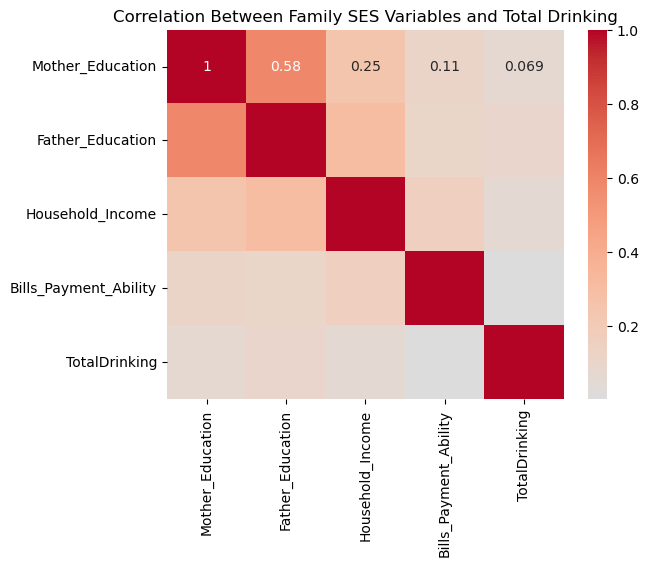

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df1[vars].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Family SES Variables and Total Drinking')
plt.show()


The correlation matrix reveals several patterns among family socioeconomic variables and their association with adolescents’ total drinking levels:

Parental Education Interrelationship
Mother’s and father’s education are strongly correlated (r = 0.58), indicating that parental education levels tend to align within the same household — a reflection of educational assortative pairing or shared socioeconomic environment.

Education and Household Income
Both mother’s (r = 0.25) and father’s education (r = 0.30) show moderate positive correlations with household income, confirming that higher parental education is generally associated with higher family income.

Financial Ability and Income
The Bills Payment Ability variable correlates modestly with Household Income (r = 0.16), suggesting that while income helps improve perceived ability to pay bills, self-reported financial comfort does not fully overlap with income level — possibly due to debt, family size, or financial management differences.

SES Variables and Total Drinking
The associations between socioeconomic factors and Total Drinking are weak and positive, with coefficients ranging from r = 0.06 to 0.10.

Father’s education (r = 0.10) and mother’s education (r = 0.07) show slight positive links with drinking behavior.

Household income (r = 0.06) also exhibits a small positive relationship.

Bills payment ability (r ≈ 0.00) is practically unrelated.

These weak positive relationships imply that adolescent drinking is not strongly shaped by family income or parental education in this sample. If anything, there may be a slight tendency for higher-SES adolescents to report higher drinking levels, possibly reflecting greater access to alcohol or social opportunities rather than economic stress.

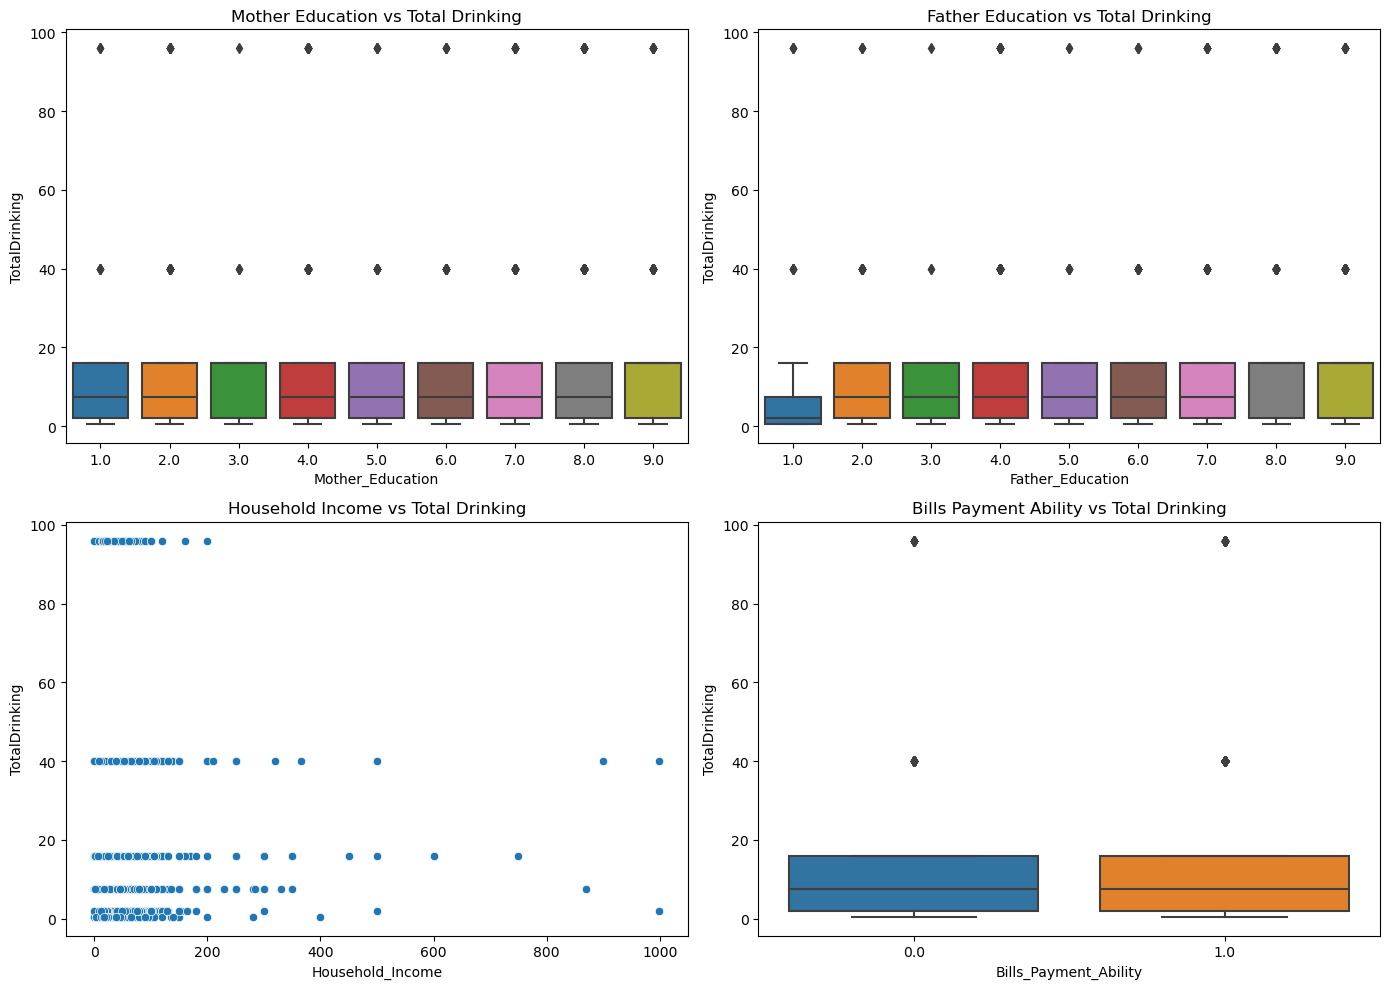

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.boxplot(x='Mother_Education', y='TotalDrinking', data=df1, ax=axes[0,0])
axes[0,0].set_title('Mother Education vs Total Drinking')

sns.boxplot(x='Father_Education', y='TotalDrinking', data=df1, ax=axes[0,1])
axes[0,1].set_title('Father Education vs Total Drinking')

sns.scatterplot(x='Household_Income', y='TotalDrinking', data=df1, ax=axes[1,0])
axes[1,0].set_title('Household Income vs Total Drinking')

# Boxplot only for Bills Payment Ability
sns.boxplot(x='Bills_Payment_Ability', y='TotalDrinking', data=df1, ax=axes[1,1])
axes[1,1].set_title('Bills Payment Ability vs Total Drinking')

plt.tight_layout()
plt.show()


In [70]:
import statsmodels.api as sm

for var in ['Mother_Education', 'Father_Education', 'Household_Income', 'Bills_Payment_Ability']:
    X = sm.add_constant(df1[var])
    y = df1['TotalDrinking']
    model = sm.OLS(y, X, missing='drop').fit()
    print(f"\n{var}:")
    print(model.summary().tables[1])



Mother_Education:
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.1821      0.898     12.451      0.000       9.421      12.943
Mother_Education     0.5808      0.145      4.019      0.000       0.297       0.864

Father_Education:
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.9959      0.992     10.079      0.000       8.051      11.941
Father_Education     0.8237      0.157      5.242      0.000       0.516       1.132

Household_Income:
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.5603      0.482     28.158      0.000      12.616      14.505
Househol

1. Mother’s Education

Coefficient (β = 0.58, p < 0.001)

Each one-unit increase in mother’s education level is associated with an average increase of 0.58 units in total drinking, holding other factors constant.

This is a statistically significant but modest positive effect, suggesting that adolescents with more educated mothers tend to report slightly higher levels of alcohol consumption.

2. Father’s Education

Coefficient (β = 0.82, p < 0.001)

The association is stronger for father’s education: each one-level increase corresponds to 0.82 higher units of total drinking.

This result is also statistically significant, reinforcing the same direction — higher parental education predicts somewhat higher drinking frequency or volume.

3. Household Income

Coefficient (β = 0.021, p = 0.001)

The effect of income is statistically significant but very small in magnitude.

This implies that increases in family income are associated with slightly higher total drinking, though the size of the effect is negligible in practical terms.

4. Bills Payment Ability

Coefficient (β = 0.15, p = 0.875)

This relationship is not statistically significant, indicating that perceived ability to pay bills does not predict drinking behavior in this sample.

Financial stress or comfort, therefore, appears unrelated to alcohol use among respondents.